<a href="https://www.kaggle.com/code/shubhamgupta012/eda-on-top-10-and-world-population-dataset?scriptVersionId=133778416" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/world-population-and-forecast-dataset/population/world-population.csv
/kaggle/input/world-population-and-forecast-dataset/population/countries/singapore-population.csv
/kaggle/input/world-population-and-forecast-dataset/population/countries/somalia-population.csv
/kaggle/input/world-population-and-forecast-dataset/population/countries/kazakhstan-population.csv
/kaggle/input/world-population-and-forecast-dataset/population/countries/central-african-republic-population.csv
/kaggle/input/world-population-and-forecast-dataset/population/countries/guyana-population.csv
/kaggle/input/world-population-and-forecast-dataset/population/countries/bolivia-population.csv
/kaggle/input/world-population-and-forecast-dataset/population/countries/united-arab-emirates-population.csv
/kaggle/input/world-population-and-forecast-dataset/population/countries/bahamas-population.csv
/kaggle/input/world-population-and-forecast-dataset/population/countries/saudi-arabia-population.csv
/kaggle/input

In [2]:
world = pd.read_csv('/kaggle/input/world-population-and-forecast-dataset/population/world-population.csv')
world.tail(200)

,country,Year,Population,Yearly % Change,Yearly Change,Migrants (net),Median Age,Fertility Rate,Density (P/Km²),Urban Pop %,Urban Population,Country's Share of World Pop,World Population,Rank
3996,United States,1965,199733676,1.36 %,2602621,367146.0,28.6,3.23,22,71.9 %,143624659,5.98 %,3339583597,3
3997,United States,1960,186720571,1.69 %,3007047,424979.0,29.7,3.58,20,70.0 %,130757407,6.15 %,3034949748,3
3998,United States,1955,171685336,1.57 %,2576188,173553.0,30.3,3.31,19,67.2 %,115375863,6.19 %,2773019936,3
3999,United States Virgin Islands,2020,104425,-0.15 %,-153,-451.0,42.6,2.05,298,96.3 %,100599,0.00 %,7794798739,199
4000,United States Virgin Islands,2019,104578,-0.10 %,-102,-451.0,41.5,2.24,299,96.1 %,100537,0.00 %,7713468100,198
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4191,Zimbabwe,1975,6293875,3.54 %,200914,-9109.0,15.4,7.40,16,19.3 %,1215331,0.15 %,4079480606,79
4192,Zimbabwe,1970,5289303,3.42 %,163625,-8400.0,15.6,7.40,14,17.0 %,898584,0.14 %,3700437046,79
4193,Zimbabwe,1965,4471177,3.43 %,138899,-3002.0,16.0,7.30,12,14.4 %,644767,0.13 %,3339583597,91
4194,Zimbabwe,1960,3776681,3.28 %,112679,-1501.0,17.2,7.00,10,12.5 %,472478,0.12 %,3034949748,87


In [3]:
world.shape

(4196, 14)

In [4]:
world.describe()

,Year,Population,Yearly Change,Migrants (net),Median Age,Fertility Rate,Density (P/Km²),World Population,Rank
count,4196.000000,4.196000e+03,4.196000e+03,3.618000e+03,3618.000000,3618.000000,4196.000000,4.196000e+03,4196.000000
mean,1993.957340,2.442938e+07,3.297777e+05,-4.818684e+00,25.474986,3.887186,343.500953,5.677487e+09,117.185653
std,21.686153,1.067293e+08,1.334212e+06,1.060564e+05,8.218262,1.985077,1751.259611,1.732760e+09,67.506229
min,1955.000000,6.440000e+02,-6.730240e+05,-1.077397e+06,14.400000,0.850000,0.000000,2.773020e+09,1.000000
25%,1975.000000,2.855070e+05,1.324250e+03,-1.228375e+04,18.500000,2.090000,21.000000,4.079481e+09,59.000000
50%,1995.000000,3.685932e+06,3.892450e+04,-9.000000e+02,22.750000,3.400000,71.000000,5.744213e+09,117.000000
75%,2016.000000,1.305111e+07,2.075432e+05,5.000000e+03,31.600000,5.740000,171.000000,7.464022e+09,175.000000
max,2020.000000,1.439324e+09,2.067648e+07,1.771991e+06,48.400000,8.800000,26150.000000,7.794799e+09,235.000000


In [5]:
world.dtypes

country                           object
Year                               int64
Population                         int64
Yearly %   Change                 object
Yearly  Change                     int64
Migrants (net)                   float64
Median Age                       float64
Fertility Rate                   float64
Density (P/Km²)                    int64
Urban  Pop %                      object
Urban Population                  object
Country's Share of  World Pop     object
World Population                   int64
Rank                               int64
dtype: object

In [6]:
# world['Yearly %   Yearly %   Change'] = world['Yearly %   Change'].str.replace(r'[^\w\s]', '')
# world['Yearly %   Change']=world['Yearly %   Change'].astype(str).astype(float)

# handling null values

In [7]:
percent_null=(world.isnull().sum())/world.count() * 100

In [8]:
percent_null

country                           0.000000
Year                              0.000000
Population                        0.000000
Yearly %   Change                 0.000000
Yearly  Change                    0.000000
Migrants (net)                   15.975677
Median Age                       15.975677
Fertility Rate                   15.975677
Density (P/Km²)                   0.000000
Urban  Pop %                      0.000000
Urban Population                  0.000000
Country's Share of  World Pop     0.000000
World Population                  0.000000
Rank                              0.000000
dtype: float64

In [9]:
world['Migrants (net)'] = world['Migrants (net)'].fillna(world['Migrants (net)'].mean())
world['Median Age'] = world['Median Age'].fillna(world['Median Age'].mean())
world['Fertility Rate'] = world['Fertility Rate'].fillna(world['Fertility Rate'].mean())

In [10]:
world.isnull().sum()

country                          0
Year                             0
Population                       0
Yearly %   Change                0
Yearly  Change                   0
Migrants (net)                   0
Median Age                       0
Fertility Rate                   0
Density (P/Km²)                  0
Urban  Pop %                     0
Urban Population                 0
Country's Share of  World Pop    0
World Population                 0
Rank                             0
dtype: int64

In [11]:
world.duplicated().sum()

0

In [12]:
world['country'].value_counts()

Afghanistan       18
Norway            18
Myanmar           18
Namibia           18
Nepal             18
                  ..
San Marino        17
Cook Islands      17
Sint Maarten      17
Cayman Islands    17
Liechtenstein     17
Name: country, Length: 235, dtype: int64

In [13]:
world['Year'].value_counts()

1995    235
2019    235
1960    235
1965    235
1970    235
1975    235
1980    235
1985    235
1990    235
1955    235
2000    235
2005    235
2010    235
2015    235
2016    235
2017    235
2018    235
2020    201
Name: Year, dtype: int64

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
country = world.groupby('country')
country.head(5)

,country,Year,Population,Yearly % Change,Yearly Change,Migrants (net),Median Age,Fertility Rate,Density (P/Km²),Urban Pop %,Urban Population,Country's Share of World Pop,World Population,Rank
0,Afghanistan,2020,38928346,2.33 %,886592,-62920.0,18.4,4.56,60,25.4 %,9904337,0.50 %,7794798739,37
1,Afghanistan,2019,38041754,2.34 %,869833,-62920.0,17.4,5.26,58,25.2 %,9582625,0.49 %,7713468100,37
2,Afghanistan,2018,37171921,2.41 %,875808,-62920.0,17.4,5.26,57,24.9 %,9273302,0.49 %,7631091040,38
3,Afghanistan,2017,36296113,2.58 %,913081,-62920.0,17.4,5.26,56,24.7 %,8971472,0.48 %,7547858925,39
4,Afghanistan,2016,35383032,2.82 %,969429,-62920.0,17.4,5.26,54,24.5 %,8670939,0.47 %,7464022049,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4178,Zimbabwe,2020,14862924,1.48 %,217456,-116858.0,18.7,3.63,38,38.4 %,5700460,0.19 %,7794798739,74
4179,Zimbabwe,2019,14645468,1.43 %,206666,-116858.0,18.5,3.99,38,38.0 %,5571525,0.19 %,7713468100,74
4180,Zimbabwe,2018,14438802,1.42 %,202207,-116858.0,18.5,3.99,37,37.7 %,5447513,0.19 %,7631091040,74
4181,Zimbabwe,2017,14236595,1.47 %,206264,-116858.0,18.5,3.99,37,37.4 %,5328766,0.19 %,7547858925,74


In [16]:
india_data=country.get_group('India')
india_data

,country,Year,Population,Yearly % Change,Yearly Change,Migrants (net),Median Age,Fertility Rate,Density (P/Km²),Urban Pop %,Urban Population,Country's Share of World Pop,World Population,Rank
1696,India,2020,1380004385,0.99 %,13586631,-532687.0,28.4,2.24,464,35.0 %,483098640,17.70 %,7794798739,2
1697,India,2019,1366417754,1.02 %,13775474,-532687.0,27.1,2.36,460,34.5 %,471828295,17.71 %,7713468100,2
1698,India,2018,1352642280,1.04 %,13965495,-532687.0,27.1,2.36,455,34.1 %,460779764,17.73 %,7631091040,2
1699,India,2017,1338676785,1.07 %,14159536,-532687.0,27.1,2.36,450,33.6 %,449963381,17.74 %,7547858925,2
1700,India,2016,1324517249,1.10 %,14364846,-532687.0,27.1,2.36,445,33.2 %,439391699,17.75 %,7464022049,2
1701,India,2015,1310152403,1.20 %,15174247,-470015.0,26.8,2.40,441,32.7 %,429069459,17.75 %,7379797139,2
1702,India,2010,1234281170,1.47 %,17334249,-531169.0,25.1,2.80,415,30.8 %,380744554,17.74 %,6956823603,2
1703,India,2005,1147609927,1.67 %,18206876,-377797.0,23.8,3.14,386,29.1 %,334479406,17.54 %,6541907027,2
1704,India,2000,1056575549,1.85 %,18530592,-136514.0,22.7,3.48,355,27.6 %,291350282,17.20 %,6143493823,2
1705,India,1995,963922588,1.99 %,18128958,-110590.0,21.8,3.83,324,26.5 %,255558824,16.78 %,5744212979,2


In [17]:
Year = world.groupby('Year')
Year.first()

,country,Population,Yearly % Change,Yearly Change,Migrants (net),Median Age,Fertility Rate,Density (P/Km²),Urban Pop %,Urban Population,Country's Share of World Pop,World Population,Rank
Year,,,,,,,,,,,,,
1955,Afghanistan,8270991,1.30 %,103775,-4000.0,19.2,7.45,13,7.1 %,587818,0.30 %,2773019936,48
1960,Afghanistan,8996973,1.70 %,145196,-4000.0,18.8,7.45,14,8.4 %,755797,0.30 %,3034949748,48
1965,Afghanistan,9956320,2.05 %,191869,-4000.0,18.4,7.45,15,9.9 %,984350,0.30 %,3339583597,48
1970,Afghanistan,11173642,2.33 %,243464,-4000.0,17.9,7.45,17,11.6 %,1295433,0.30 %,3700437046,48
1975,Afghanistan,12689160,2.58 %,303104,-4000.0,17.3,7.45,19,13.5 %,1717422,0.31 %,4079480606,48
1980,Afghanistan,13356511,1.03 %,133470,-230792.0,16.9,7.45,20,15.9 %,2119078,0.30 %,4458003514,51
1985,Afghanistan,11938208,-2.22 %,-283661,-669019.0,16.2,7.45,18,18.8 %,2238468,0.25 %,4870921740,56
1990,Afghanistan,12412308,0.78 %,94820,-305070.0,15.8,7.47,19,20.9 %,2593947,0.23 %,5327231061,57
1995,Afghanistan,18110657,7.85 %,1139670,615277.0,16.0,7.48,28,20.4 %,3697570,0.32 %,5744212979,50


In [18]:
Year_2020  = Year.get_group(2020)
Year_2020

,country,Year,Population,Yearly % Change,Yearly Change,Migrants (net),Median Age,Fertility Rate,Density (P/Km²),Urban Pop %,Urban Population,Country's Share of World Pop,World Population,Rank
0,Afghanistan,2020,38928346,2.33 %,886592,-62920.0,18.4,4.56,60,25.4 %,9904337,0.50 %,7794798739,37
18,Albania,2020,2877797,-0.11 %,-3120,-14000.0,36.4,1.62,105,63.5 %,1827362,0.04 %,7794798739,140
36,Algeria,2020,43851044,1.85 %,797990,-10000.0,28.5,3.05,18,72.9 %,31950910,0.56 %,7794798739,33
88,Angola,2020,32866272,3.27 %,1040977,6413.0,16.7,5.55,26,66.7 %,21936953,0.42 %,7794798739,44
123,Antigua And Barbuda,2020,97929,0.84 %,811,0.0,34.0,2.00,223,26.2 %,25682,0.00 %,7794798739,201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4089,Vietnam,2020,97338579,0.91 %,876473,-80000.0,32.5,2.06,314,37.7 %,36727248,1.25 %,7794798739,15
4124,Western Sahara,2020,597339,2.55 %,14876,5582.0,28.4,2.41,2,86.8 %,518663,0.01 %,7794798739,170
4142,Yemen,2020,29825964,2.28 %,664042,-30000.0,20.2,3.84,56,38.4 %,11465414,0.38 %,7794798739,48
4160,Zambia,2020,18383955,2.93 %,522925,-8000.0,17.6,4.66,25,45.3 %,8336381,0.24 %,7794798739,65


# Insights about Population change in Top 10 Countries w.r.t Population

# India

Text(0.5, 1.0, 'Density (P/Km²)')

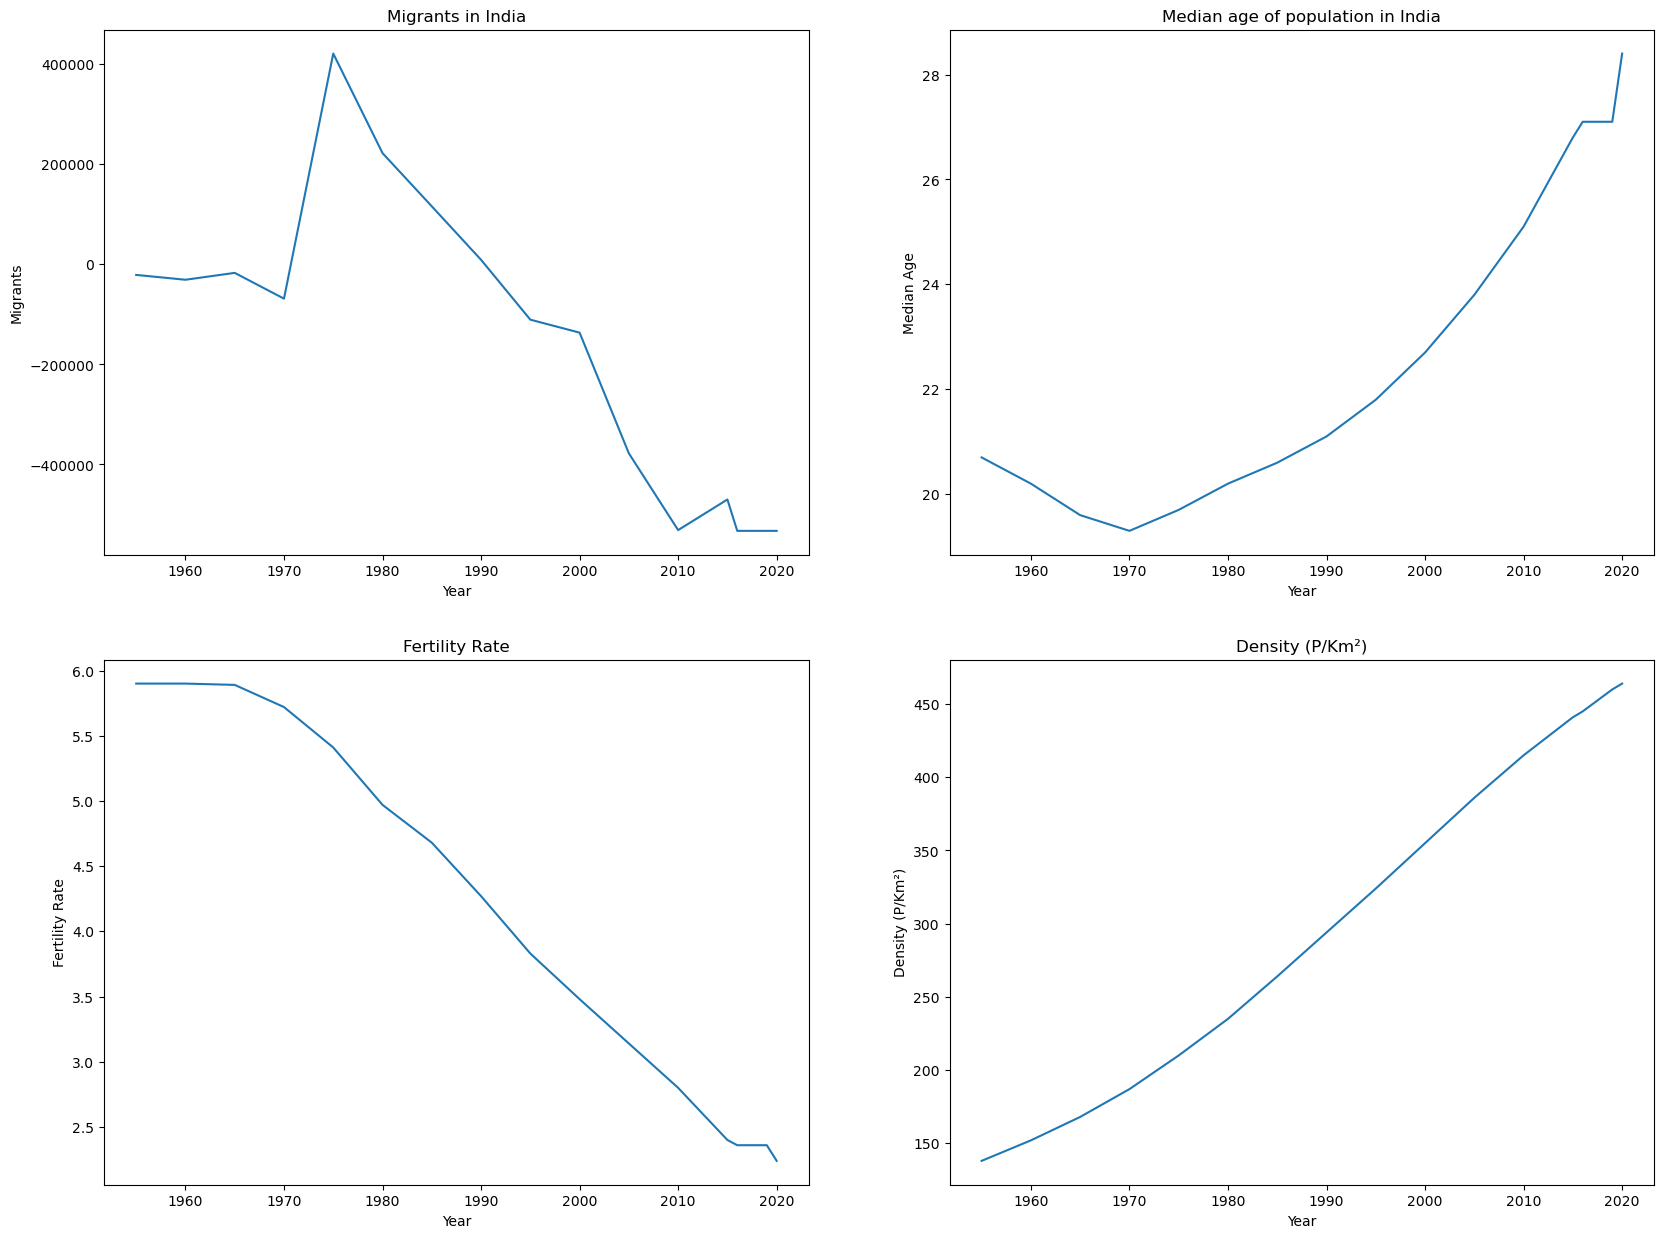

In [19]:
plt.figure(figsize=(20,15))
plt.subplot(2,2,1)
plt.plot(india_data['Year'],india_data['Migrants (net)'])
plt.xlabel('Year')
plt.ylabel('Migrants')
plt.title('Migrants in India')
plt.subplot(2,2,2)
plt.plot(india_data['Year'],india_data['Median Age'])
plt.xlabel('Year')
plt.ylabel('Median Age')
plt.title('Median age of population in India')
plt.subplot(2,2,3)
plt.plot(india_data['Year'],india_data['Fertility Rate'])
plt.xlabel('Year')
plt.ylabel('Fertility Rate')
plt.title('Fertility Rate')
plt.subplot(2,2,4)
plt.plot(india_data['Year'],india_data['Density (P/Km²)'])
plt.xlabel('Year')
plt.ylabel('Density (P/Km²)')
plt.title('Density (P/Km²)')

Text(0.5, 1.0, 'India')

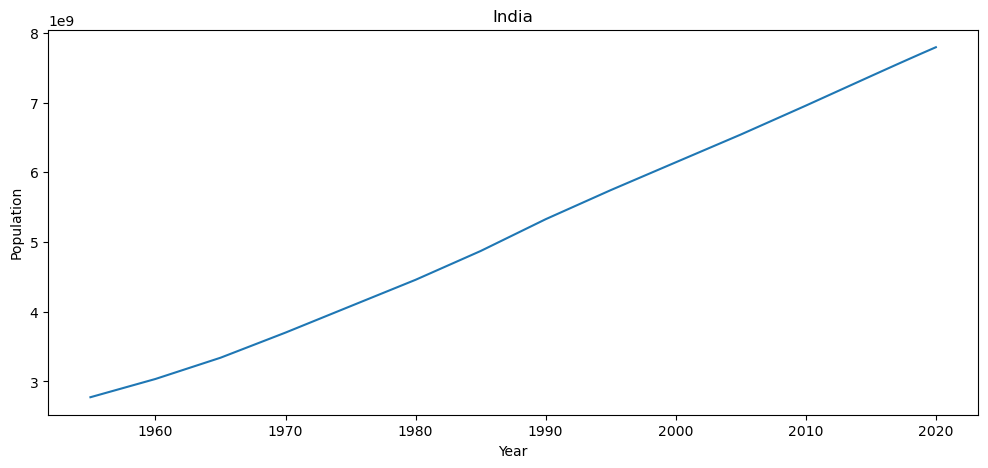

In [20]:
plt.figure(figsize=(12,5))
plt.plot(india_data['Year'],india_data['World Population'])
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('India')

# USA

In [21]:
us_data=country.get_group('United States')
us_data

,country,Year,Population,Yearly % Change,Yearly Change,Migrants (net),Median Age,Fertility Rate,Density (P/Km²),Urban Pop %,Urban Population,Country's Share of World Pop,World Population,Rank
3981,United States,2020,331002651,0.59 %,1937734,954806.0,38.3,1.78,36,82.8 %,273975139,4.25 %,7794798739,3
3982,United States,2019,329064917,0.60 %,1968652,954806.0,37.7,1.85,36,82.5 %,271365914,4.27 %,7713468100,3
3983,United States,2018,327096265,0.62 %,2011509,954806.0,37.7,1.85,36,82.2 %,268786714,4.29 %,7631091040,3
3984,United States,2017,325084756,0.64 %,2068761,954806.0,37.7,1.85,36,81.9 %,266243516,4.31 %,7547858925,3
3985,United States,2016,323015995,0.67 %,2137685,954806.0,37.7,1.85,35,81.7 %,263743312,4.33 %,7464022049,3
3986,United States,2015,320878310,0.76 %,2373367,992343.0,37.6,1.88,35,81.4 %,261287811,4.35 %,7379797139,3
3987,United States,2010,309011475,0.93 %,2803593,1085751.0,36.9,2.06,34,80.7 %,249297076,4.44 %,6956823603,3
3988,United States,2005,294993511,0.93 %,2656520,1066979.0,36.1,2.04,32,80.0 %,235892407,4.51 %,6541907027,3
3989,United States,2000,281710909,1.22 %,3309433,1771991.0,35.2,2.00,31,79.1 %,222927913,4.59 %,6143493823,3
3990,United States,1995,265163745,1.01 %,2608687,892751.0,34.0,2.03,29,77.4 %,205240402,4.62 %,5744212979,3


Text(0.5, 1.0, 'Density (P/Km²)')

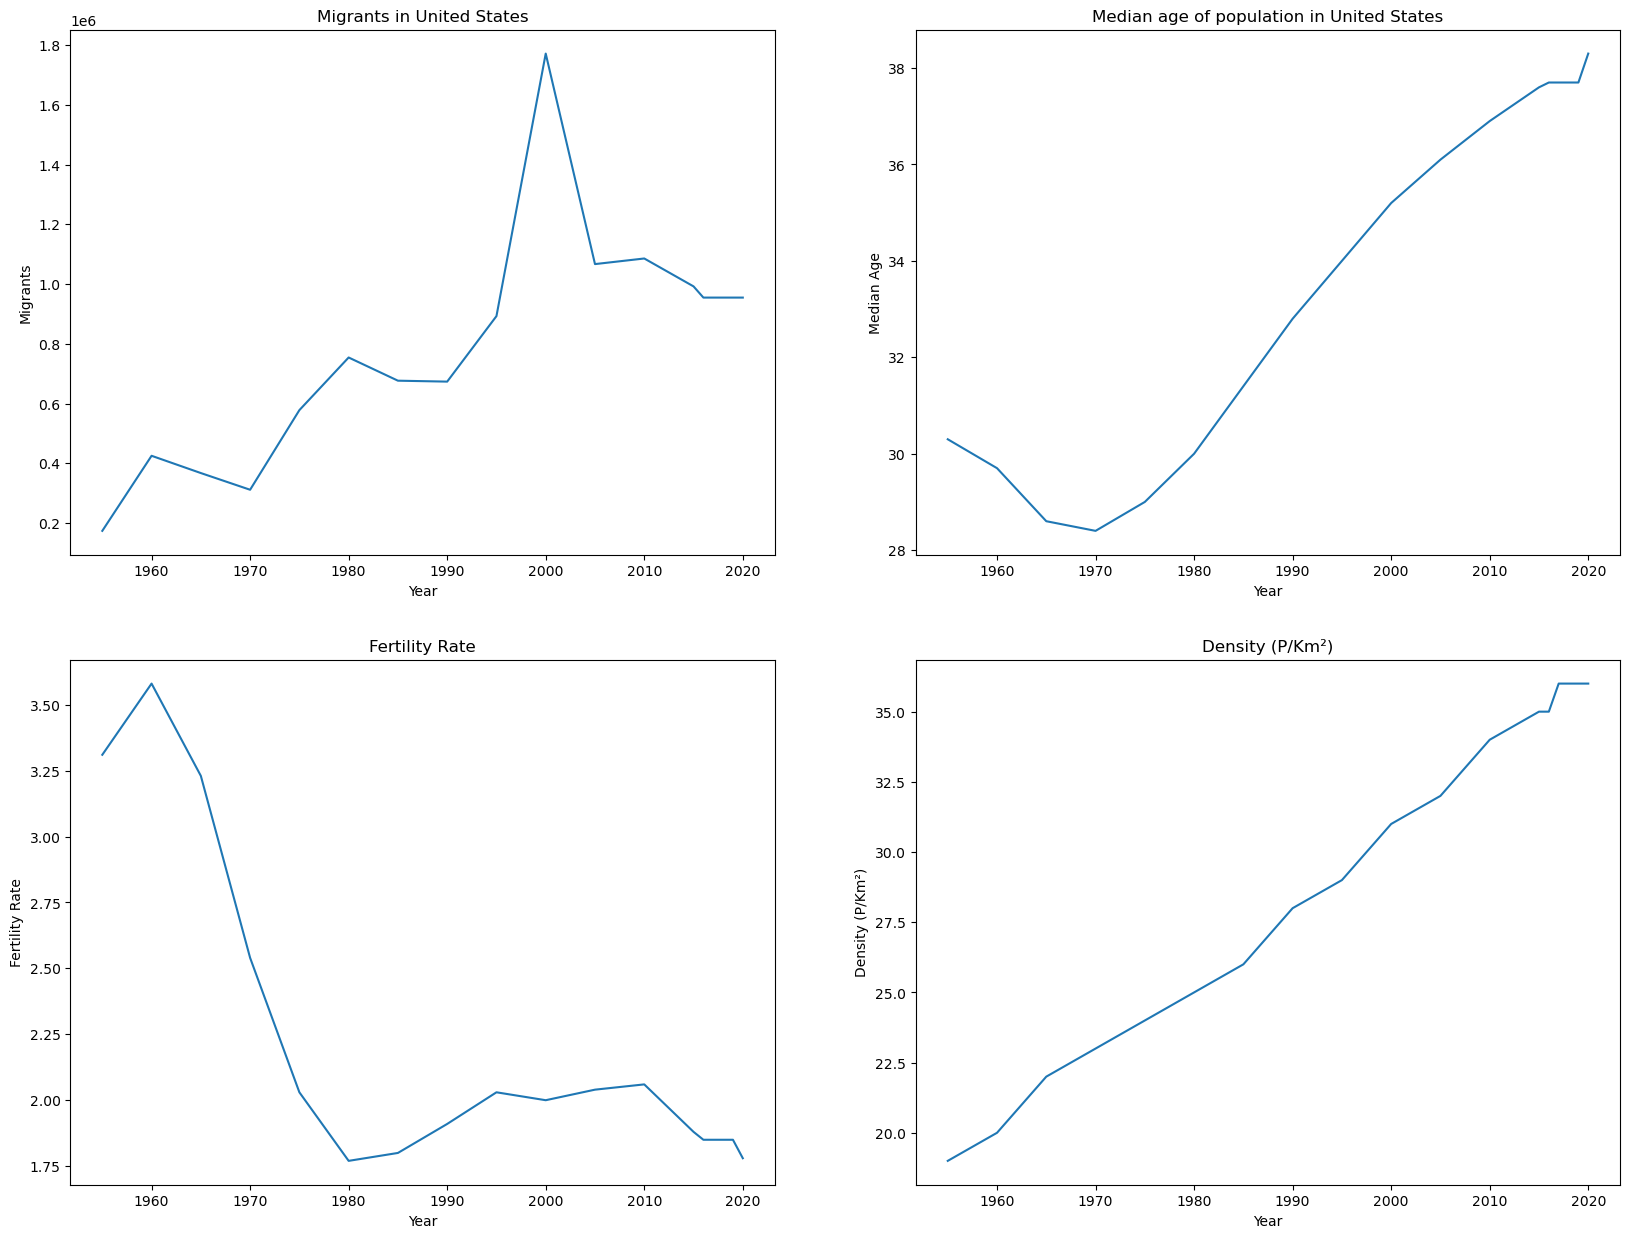

In [22]:
plt.figure(figsize=(20,15))
plt.subplot(2,2,1)
plt.plot(us_data['Year'],us_data['Migrants (net)'])
plt.xlabel('Year')
plt.ylabel('Migrants')
plt.title('Migrants in United States')
plt.subplot(2,2,2)
plt.plot(us_data['Year'],us_data['Median Age'])
plt.xlabel('Year')
plt.ylabel('Median Age')
plt.title('Median age of population in United States')
plt.subplot(2,2,3)
plt.plot(us_data['Year'],us_data['Fertility Rate'])
plt.xlabel('Year')
plt.ylabel('Fertility Rate')
plt.title('Fertility Rate')
plt.subplot(2,2,4)
plt.plot(us_data['Year'],us_data['Density (P/Km²)'])
plt.xlabel('Year')
plt.ylabel('Density (P/Km²)')
plt.title('Density (P/Km²)')

# China

In [23]:
china_data=country.get_group('China')
china_data

,country,Year,Population,Yearly % Change,Yearly Change,Migrants (net),Median Age,Fertility Rate,Density (P/Km²),Urban Pop %,Urban Population,Country's Share of World Pop,World Population,Rank
767,China,2020,1439323776,0.39 %,5540090,-348399.0,38.4,1.69,153,60.8 %,875075919,18.47 %,7794798739,1
768,China,2019,1433783686,0.43 %,6135900,-348399.0,37.0,1.65,153,59.7 %,856409297,18.59 %,7713468100,1
769,China,2018,1427647786,0.47 %,6625995,-348399.0,37.0,1.65,152,58.6 %,837022095,18.71 %,7631091040,1
770,China,2017,1421021791,0.49 %,6972440,-348399.0,37.0,1.65,151,57.5 %,816957613,18.83 %,7547858925,1
771,China,2016,1414049351,0.51 %,7201481,-348399.0,37.0,1.65,151,56.3 %,796289491,18.94 %,7464022049,1
772,China,2015,1406847870,0.55 %,7607451,-310442.0,36.7,1.64,150,55.1 %,775352918,19.06 %,7379797139,1
773,China,2010,1368810615,0.57 %,7606847,-435677.0,35.0,1.62,146,48.9 %,669353557,19.68 %,6956823603,1
774,China,2005,1330776380,0.62 %,8045123,-393116.0,32.6,1.61,142,42.2 %,561983323,20.34 %,6541907027,1
775,China,2000,1290550765,0.79 %,9926046,-76600.0,30.0,1.62,137,35.7 %,460377048,21.01 %,6143493823,1
776,China,1995,1240920535,1.07 %,12807372,-155996.0,27.4,1.83,132,30.9 %,383901711,21.60 %,5744212979,1


Text(0.5, 1.0, 'Density (P/Km²)')

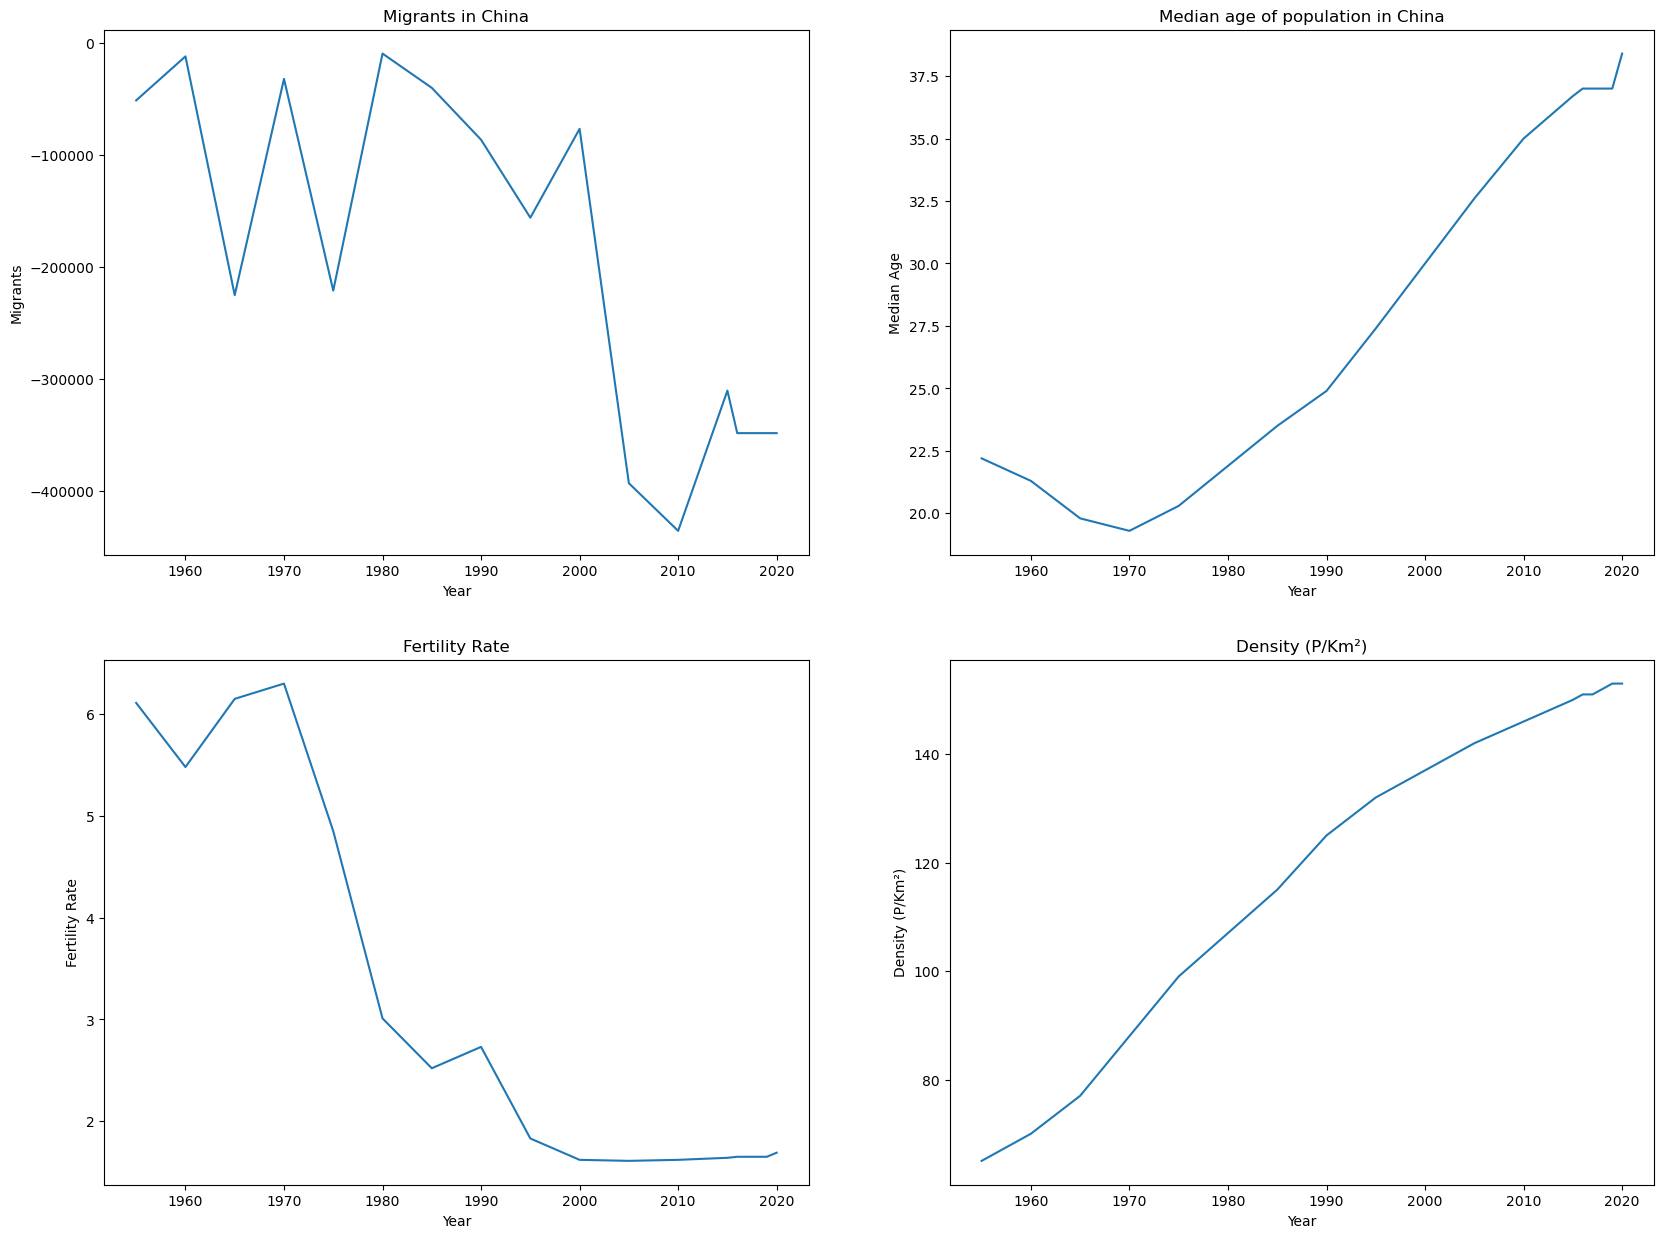

In [24]:
plt.figure(figsize=(20,15))
plt.subplot(2,2,1)
plt.plot(china_data['Year'],china_data['Migrants (net)'])
plt.xlabel('Year')
plt.ylabel('Migrants')
plt.title('Migrants in China')
plt.subplot(2,2,2)
plt.plot(china_data['Year'],china_data['Median Age'])
plt.xlabel('Year')
plt.ylabel('Median Age')
plt.title('Median age of population in China')
plt.subplot(2,2,3)
plt.plot(china_data['Year'],china_data['Fertility Rate'])
plt.xlabel('Year')
plt.ylabel('Fertility Rate')
plt.title('Fertility Rate')
plt.subplot(2,2,4)
plt.plot(china_data['Year'],china_data['Density (P/Km²)'])
plt.xlabel('Year')
plt.ylabel('Density (P/Km²)')
plt.title('Density (P/Km²)')

# Indonesia

In [25]:
indonesia_data=country.get_group('Indonesia')
indonesia_data

,country,Year,Population,Yearly % Change,Yearly Change,Migrants (net),Median Age,Fertility Rate,Density (P/Km²),Urban Pop %,Urban Population,Country's Share of World Pop,World Population,Rank
1714,Indonesia,2020,273523615,1.07 %,2898047,-98955.0,29.7,2.32,151,56.4 %,154188546,3.51 %,7794798739,4
1715,Indonesia,2019,270625568,1.10 %,2955025,-98955.0,28.8,2.42,149,55.8 %,150900390,3.51 %,7713468100,4
1716,Indonesia,2018,267670543,1.14 %,3019580,-98955.0,28.8,2.42,148,55.1 %,147603006,3.51 %,7631091040,4
1717,Indonesia,2017,264650963,1.18 %,3094582,-98955.0,28.8,2.42,146,54.5 %,144294861,3.51 %,7547858925,4
1718,Indonesia,2016,261556381,1.23 %,3173125,-98955.0,28.8,2.42,144,53.9 %,140972925,3.50 %,7464022049,4
1719,Indonesia,2015,258383256,1.33 %,3309808,-90889.0,28.5,2.45,143,53.3 %,137634761,3.50 %,7379797139,4
1720,Indonesia,2010,241834215,1.34 %,3108949,-266737.0,27.2,2.50,133,50.1 %,121052980,3.48 %,6956823603,4
1721,Indonesia,2005,226289470,1.36 %,2955129,-229931.0,25.6,2.53,125,46.0 %,104155654,3.46 %,6541907027,4
1722,Indonesia,2000,211513823,1.44 %,2915913,-13534.0,24.4,2.55,117,42.0 %,88851487,3.44 %,6143493823,4
1723,Indonesia,1995,196934260,1.66 %,3104172,-7082.0,22.8,2.90,109,36.1 %,71053577,3.43 %,5744212979,4


Text(0.5, 1.0, 'Density (P/Km²)')

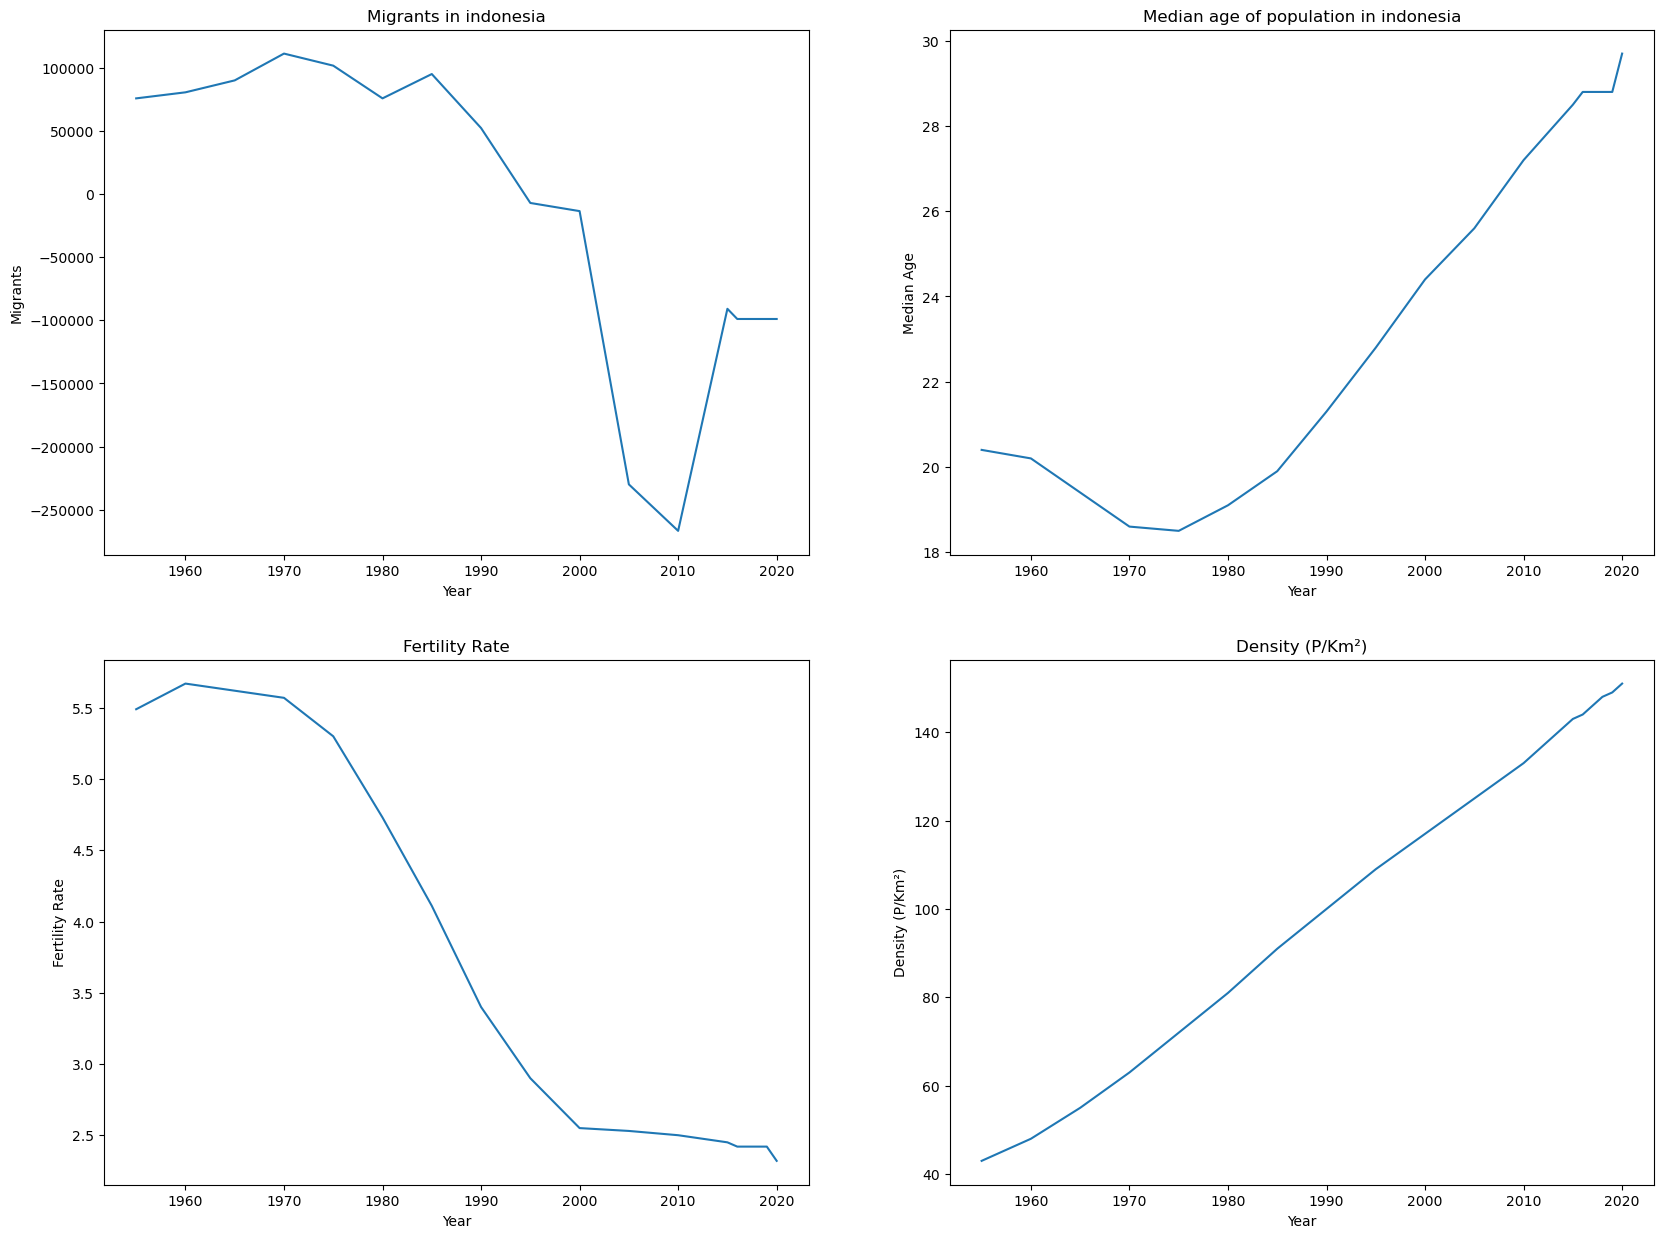

In [26]:
plt.figure(figsize=(20,15))
plt.subplot(2,2,1)
plt.plot(indonesia_data['Year'],indonesia_data['Migrants (net)'])
plt.xlabel('Year')
plt.ylabel('Migrants')
plt.title('Migrants in indonesia')
plt.subplot(2,2,2)
plt.plot(indonesia_data['Year'],indonesia_data['Median Age'])
plt.xlabel('Year')
plt.ylabel('Median Age')
plt.title('Median age of population in indonesia')
plt.subplot(2,2,3)
plt.plot(indonesia_data['Year'],indonesia_data['Fertility Rate'])
plt.xlabel('Year')
plt.ylabel('Fertility Rate')
plt.title('Fertility Rate')
plt.subplot(2,2,4)
plt.plot(indonesia_data['Year'],indonesia_data['Density (P/Km²)'])
plt.xlabel('Year')
plt.ylabel('Density (P/Km²)')
plt.title('Density (P/Km²)')

# Pakistan

In [27]:
pakistan_data=country.get_group('Pakistan')
pakistan_data

,country,Year,Population,Yearly % Change,Yearly Change,Migrants (net),Median Age,Fertility Rate,Density (P/Km²),Urban Pop %,Urban Population,Country's Share of World Pop,World Population,Rank
2804,Pakistan,2020,220892340,2.00 %,4327022,-233379.0,22.8,3.55,287,35.1 %,77437729,2.83 %,7794798739,5
2805,Pakistan,2019,216565318,2.04 %,4337032,-233379.0,22.0,3.73,281,34.9 %,75510639,2.81 %,7713468100,5
2806,Pakistan,2018,212228286,2.08 %,4322077,-233379.0,22.0,3.73,275,34.7 %,73630430,2.78 %,7631091040,5
2807,Pakistan,2017,207906209,2.10 %,4274856,-233379.0,22.0,3.73,270,34.5 %,71795700,2.75 %,7547858925,5
2808,Pakistan,2016,203631353,2.11 %,4204389,-233379.0,22.0,3.73,264,34.4 %,70005271,2.73 %,7464022049,6
2809,Pakistan,2015,199426964,2.14 %,4000465,-215833.0,21.8,3.78,259,34.2 %,68226783,2.70 %,7379797139,6
2810,Pakistan,2010,179424641,2.28 %,3824127,-67961.0,20.7,4.17,233,33.3 %,59691513,2.58 %,6956823603,6
2811,Pakistan,2005,160304008,2.41 %,3592086,-130036.0,19.6,4.71,208,32.6 %,52301807,2.45 %,6541907027,6
2812,Pakistan,2000,142343578,2.83 %,3713348,94182.0,18.8,5.37,185,32.1 %,45687389,2.32 %,6143493823,7
2813,Pakistan,1995,123776839,2.83 %,3225784,-204677.0,18.4,5.96,161,31.6 %,39104110,2.15 %,5744212979,8


Text(0.5, 1.0, 'Density (P/Km²)')

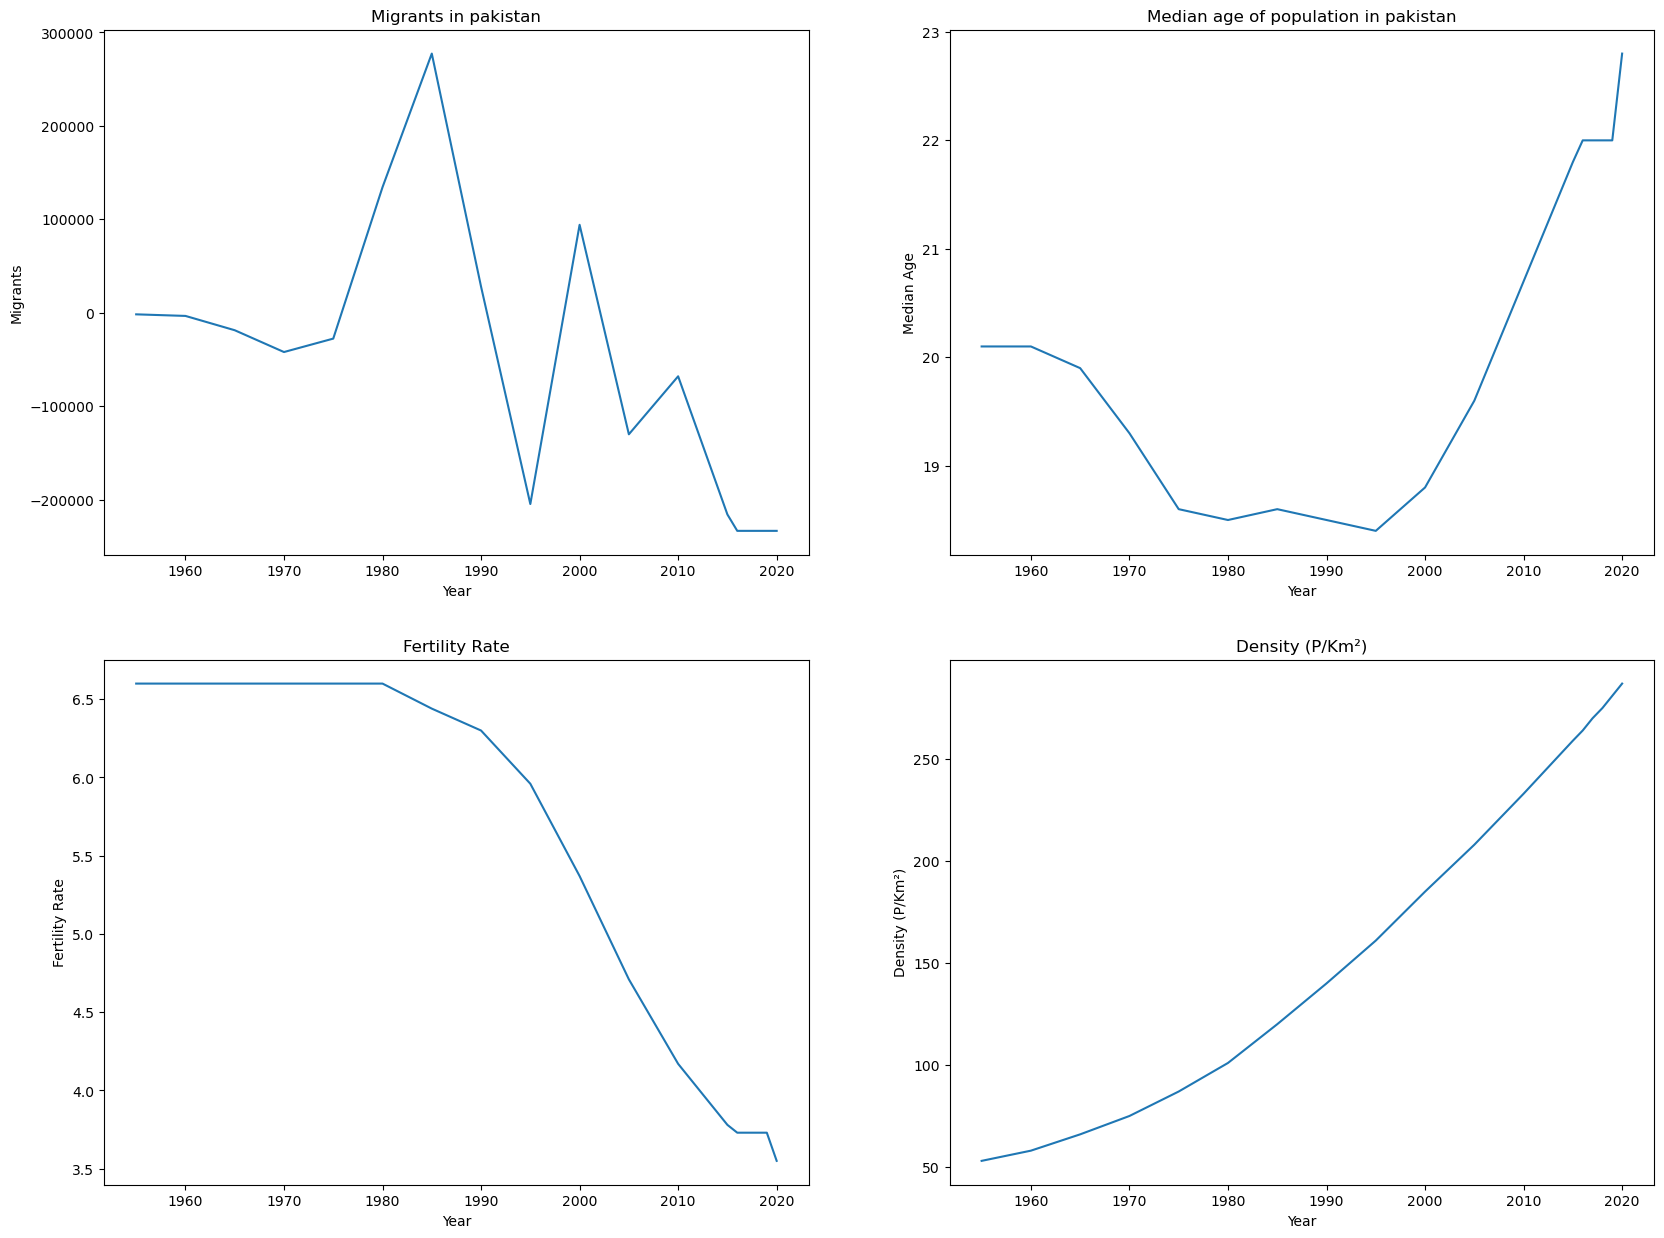

In [28]:
plt.figure(figsize=(20,15))
plt.subplot(2,2,1)
plt.plot(pakistan_data['Year'],pakistan_data['Migrants (net)'])
plt.xlabel('Year')
plt.ylabel('Migrants')
plt.title('Migrants in pakistan')
plt.subplot(2,2,2)
plt.plot(pakistan_data['Year'],pakistan_data['Median Age'])
plt.xlabel('Year')
plt.ylabel('Median Age')
plt.title('Median age of population in pakistan')
plt.subplot(2,2,3)
plt.plot(pakistan_data['Year'],pakistan_data['Fertility Rate'])
plt.xlabel('Year')
plt.ylabel('Fertility Rate')
plt.title('Fertility Rate')
plt.subplot(2,2,4)
plt.plot(pakistan_data['Year'],pakistan_data['Density (P/Km²)'])
plt.xlabel('Year')
plt.ylabel('Density (P/Km²)')
plt.title('Density (P/Km²)')

# Nigeria

In [29]:
nigeria_data=country.get_group('Nigeria')
nigeria_data

,country,Year,Population,Yearly % Change,Yearly Change,Migrants (net),Median Age,Fertility Rate,Density (P/Km²),Urban Pop %,Urban Population,Country's Share of World Pop,World Population,Rank
2680,Nigeria,2020,206139589,2.58 %,5175990,-60000.0,18.1,5.42,226,52.0 %,107112526,2.64 %,7794798739,7
2681,Nigeria,2019,200963599,2.60 %,5088916,-60000.0,17.9,5.67,221,51.2 %,102805995,2.61 %,7713468100,7
2682,Nigeria,2018,195874683,2.62 %,5001439,-60000.0,17.9,5.67,215,50.3 %,98610801,2.57 %,7631091040,7
2683,Nigeria,2017,190873244,2.64 %,4913003,-60000.0,17.9,5.67,210,49.5 %,94525016,2.53 %,7547858925,7
2684,Nigeria,2016,185960241,2.66 %,4822793,-60000.0,17.9,5.67,204,48.7 %,90546177,2.49 %,7464022049,7
2685,Nigeria,2015,181137448,2.71 %,4526850,-60000.0,17.9,5.74,199,47.8 %,86673094,2.45 %,7379797139,7
2686,Nigeria,2010,158503197,2.68 %,3927636,-60000.0,17.9,5.91,174,43.5 %,68949828,2.28 %,6956823603,7
2687,Nigeria,2005,138865016,2.58 %,3316233,-34000.0,18.0,6.05,152,39.1 %,54288918,2.12 %,6541907027,9
2688,Nigeria,2000,122283850,2.53 %,2867103,-19005.0,17.9,6.17,134,34.9 %,42627440,1.99 %,6143493823,10
2689,Nigeria,1995,107948335,2.54 %,2547177,-19154.0,17.7,6.37,119,32.2 %,34785545,1.88 %,5744212979,10


Text(0.5, 1.0, 'Density (P/Km²)')

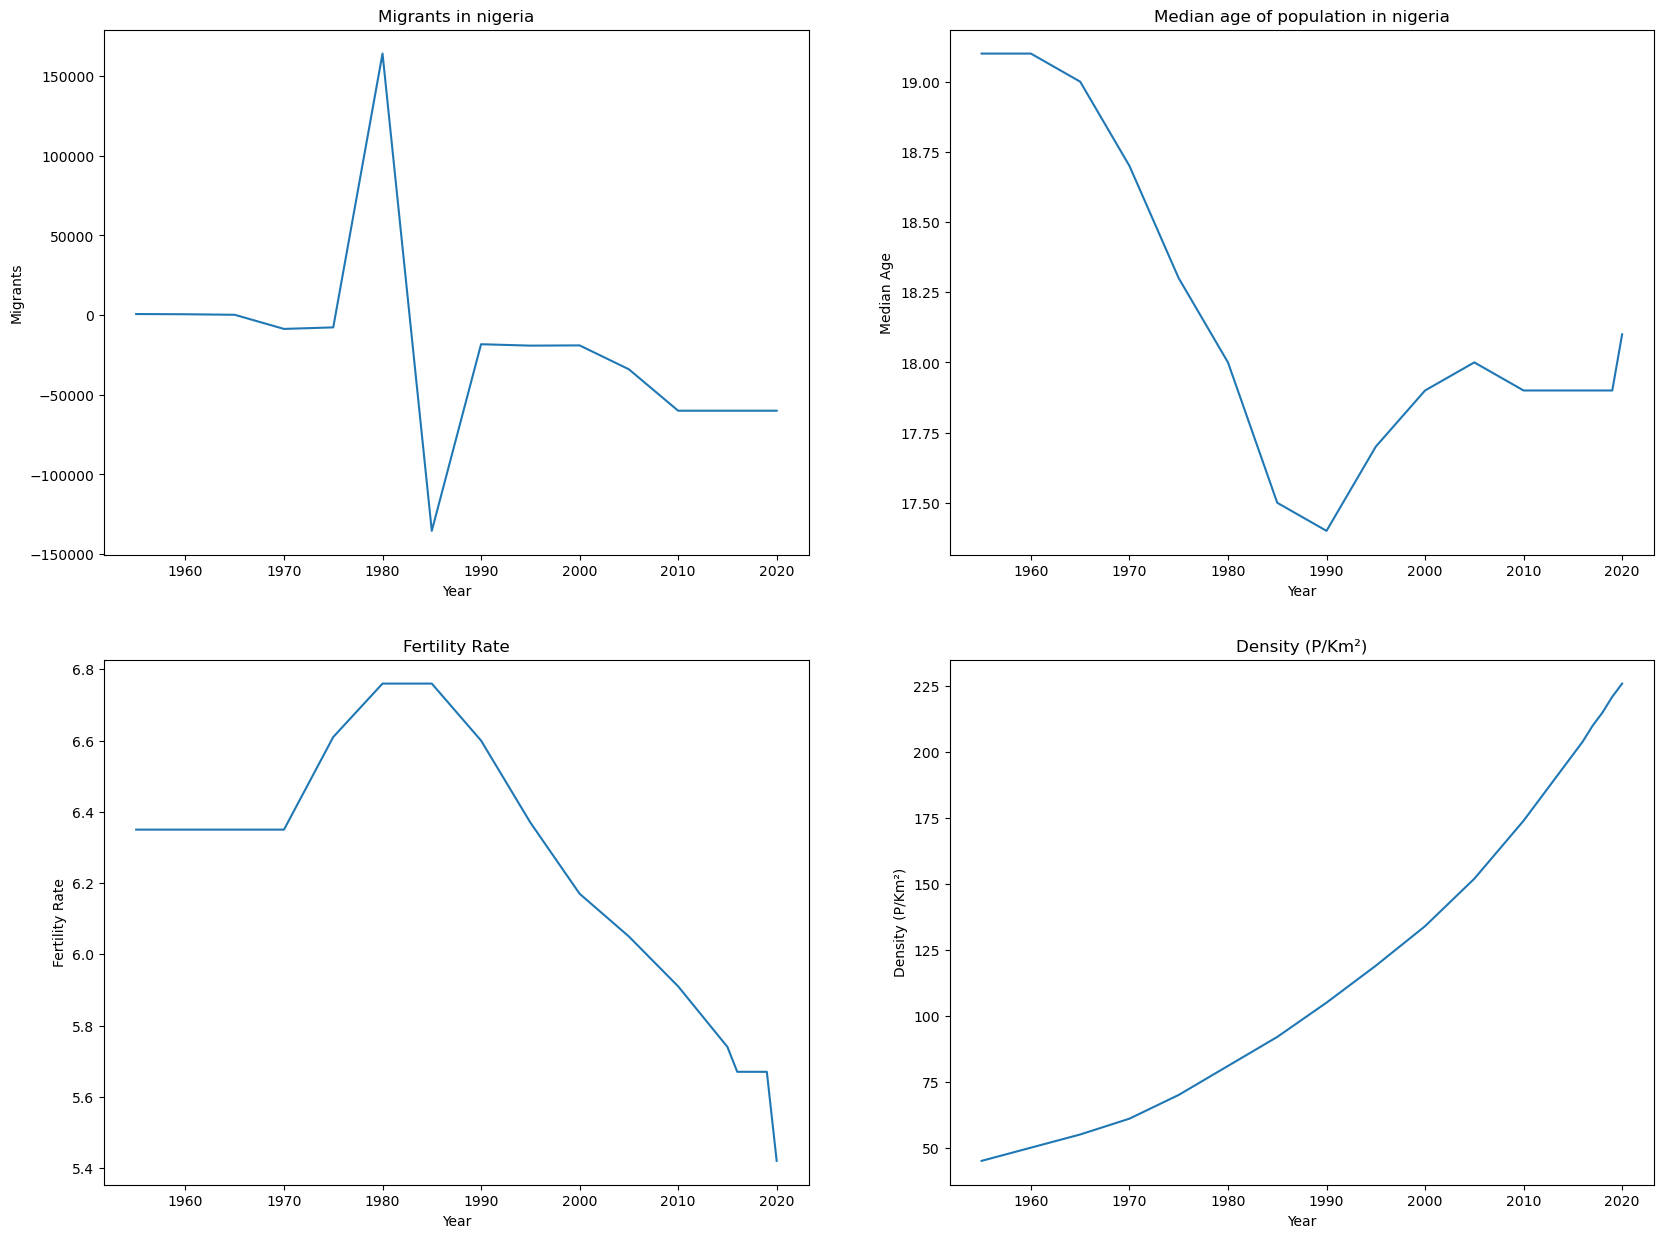

In [30]:
plt.figure(figsize=(20,15))
plt.subplot(2,2,1)
plt.plot(nigeria_data['Year'],nigeria_data['Migrants (net)'])
plt.xlabel('Year')
plt.ylabel('Migrants')
plt.title('Migrants in nigeria')
plt.subplot(2,2,2)
plt.plot(nigeria_data['Year'],nigeria_data['Median Age'])
plt.xlabel('Year')
plt.ylabel('Median Age')
plt.title('Median age of population in nigeria')
plt.subplot(2,2,3)
plt.plot(nigeria_data['Year'],nigeria_data['Fertility Rate'])
plt.xlabel('Year')
plt.ylabel('Fertility Rate')
plt.title('Fertility Rate')
plt.subplot(2,2,4)
plt.plot(nigeria_data['Year'],nigeria_data['Density (P/Km²)'])
plt.xlabel('Year')
plt.ylabel('Density (P/Km²)')
plt.title('Density (P/Km²)')

# Brazil

In [31]:
brazil_data=country.get_group('Brazil')
brazil_data.head()

,country,Year,Population,Yearly % Change,Yearly Change,Migrants (net),Median Age,Fertility Rate,Density (P/Km²),Urban Pop %,Urban Population,Country's Share of World Pop,World Population,Rank
482,Brazil,2020,212559417,0.72 %,1509890,21200.0,33.5,1.74,25,87.6 %,186217070,2.73 %,7794798739,6
483,Brazil,2019,211049527,0.75 %,1580204,21200.0,31.8,1.76,25,87.4 %,184407548,2.74 %,7713468100,6
484,Brazil,2018,209469323,0.79 %,1635500,21200.0,31.8,1.76,25,87.1 %,182546459,2.74 %,7631091040,6
485,Brazil,2017,207833823,0.81 %,1670770,21200.0,31.8,1.76,25,86.9 %,180633872,2.75 %,7547858925,6
486,Brazil,2016,206163053,0.83 %,1691284,21200.0,31.8,1.76,25,86.7 %,178669587,2.76 %,7464022049,5


Text(0.5, 1.0, 'Density (P/Km²)')

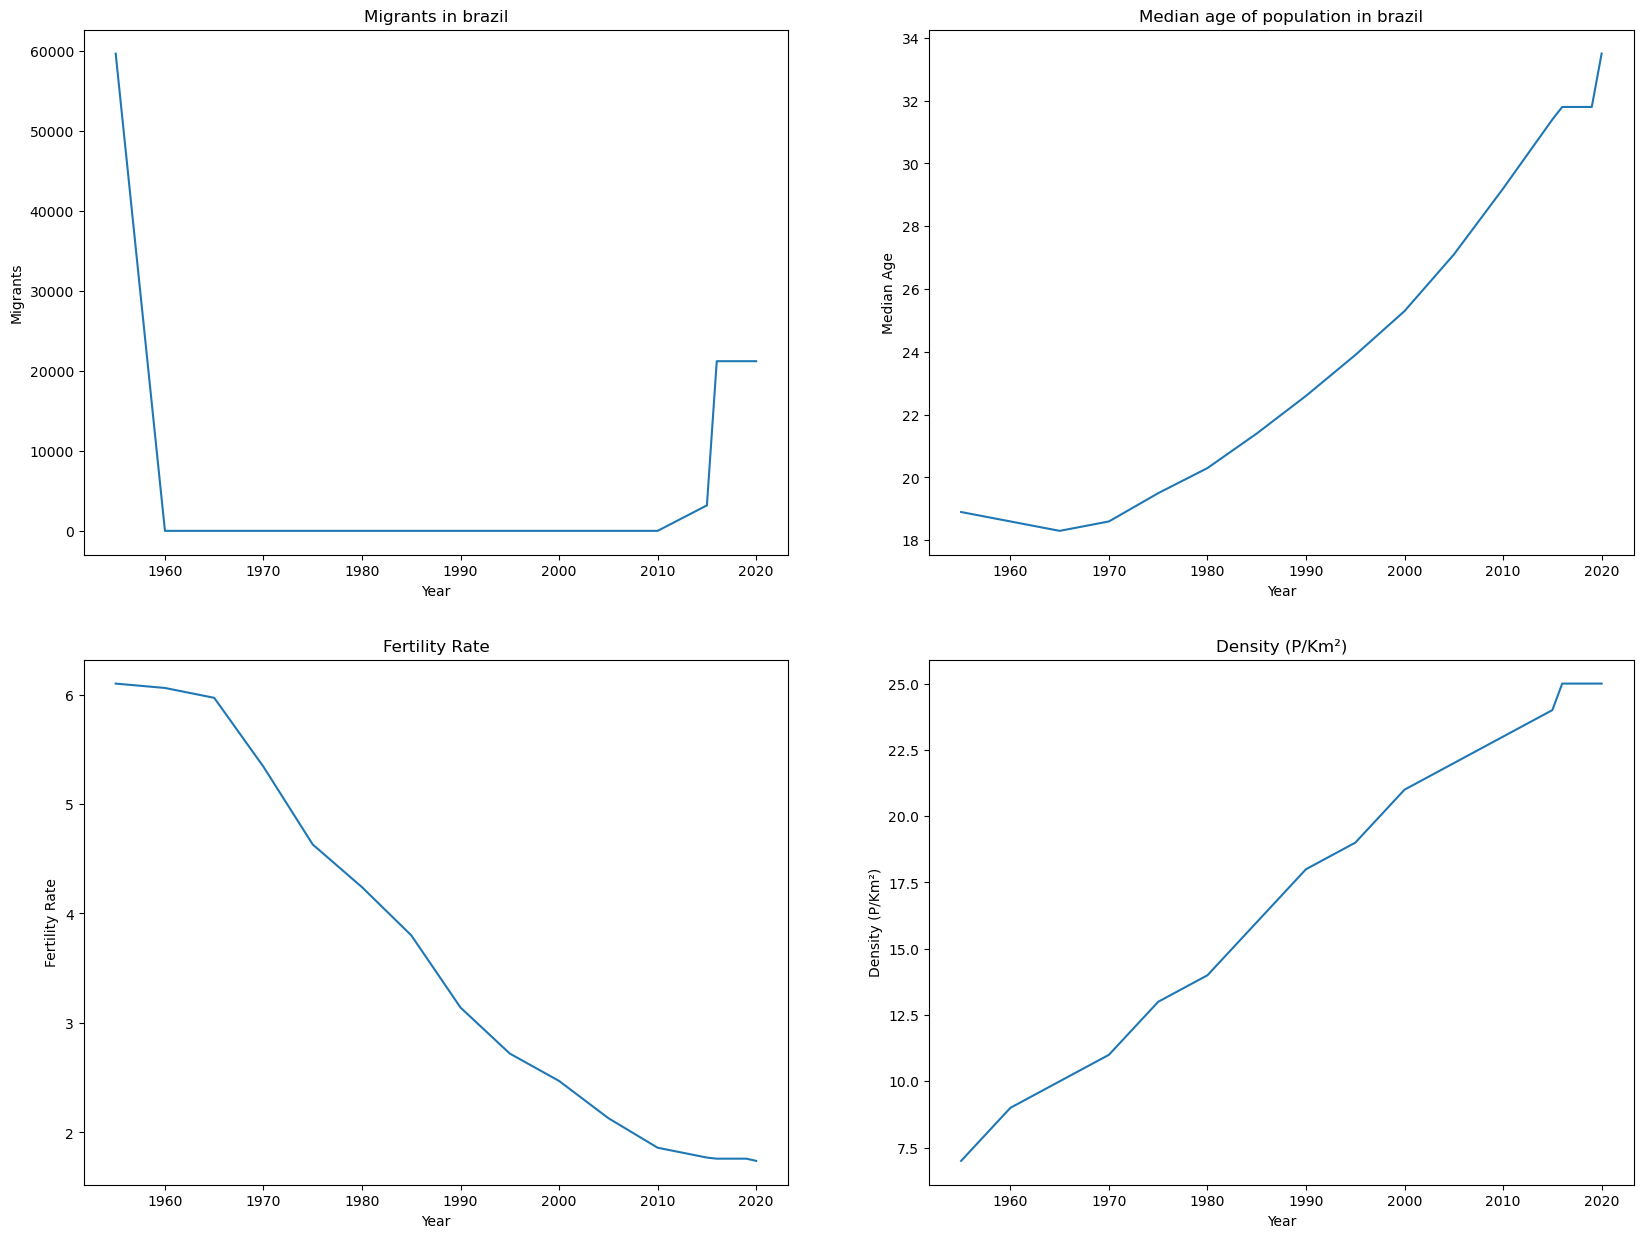

In [32]:
plt.figure(figsize=(20,15))
plt.subplot(2,2,1)
plt.plot(brazil_data['Year'],brazil_data['Migrants (net)'])
plt.xlabel('Year')
plt.ylabel('Migrants')
plt.title('Migrants in brazil')
plt.subplot(2,2,2)
plt.plot(brazil_data['Year'],brazil_data['Median Age'])
plt.xlabel('Year')
plt.ylabel('Median Age')
plt.title('Median age of population in brazil')
plt.subplot(2,2,3)
plt.plot(brazil_data['Year'],brazil_data['Fertility Rate'])
plt.xlabel('Year')
plt.ylabel('Fertility Rate')
plt.title('Fertility Rate')
plt.subplot(2,2,4)
plt.plot(brazil_data['Year'],brazil_data['Density (P/Km²)'])
plt.xlabel('Year')
plt.ylabel('Density (P/Km²)')
plt.title('Density (P/Km²)')

# Bangladesh

In [33]:
bangladesh_data=country.get_group('Bangladesh')
bangladesh_data.head()

,country,Year,Population,Yearly % Change,Yearly Change,Migrants (net),Median Age,Fertility Rate,Density (P/Km²),Urban Pop %,Urban Population,Country's Share of World Pop,World Population,Rank
285,Bangladesh,2020,164689383,1.01 %,1643222,-369501.0,27.6,2.05,1265,39.4 %,64814953,2.11 %,7794798739,8
286,Bangladesh,2019,163046161,1.03 %,1669453,-369501.0,26.1,2.18,1253,38.6 %,62865820,2.11 %,7713468100,8
287,Bangladesh,2018,161376708,1.06 %,1691284,-369501.0,26.1,2.18,1240,37.8 %,60944245,2.11 %,7631091040,8
288,Bangladesh,2017,159685424,1.08 %,1708271,-369501.0,26.1,2.18,1227,37.0 %,59046818,2.12 %,7547858925,8
289,Bangladesh,2016,157977153,1.10 %,1720877,-369501.0,26.1,2.18,1214,36.2 %,57168030,2.12 %,7464022049,8


Text(0.5, 1.0, 'Density (P/Km²)')

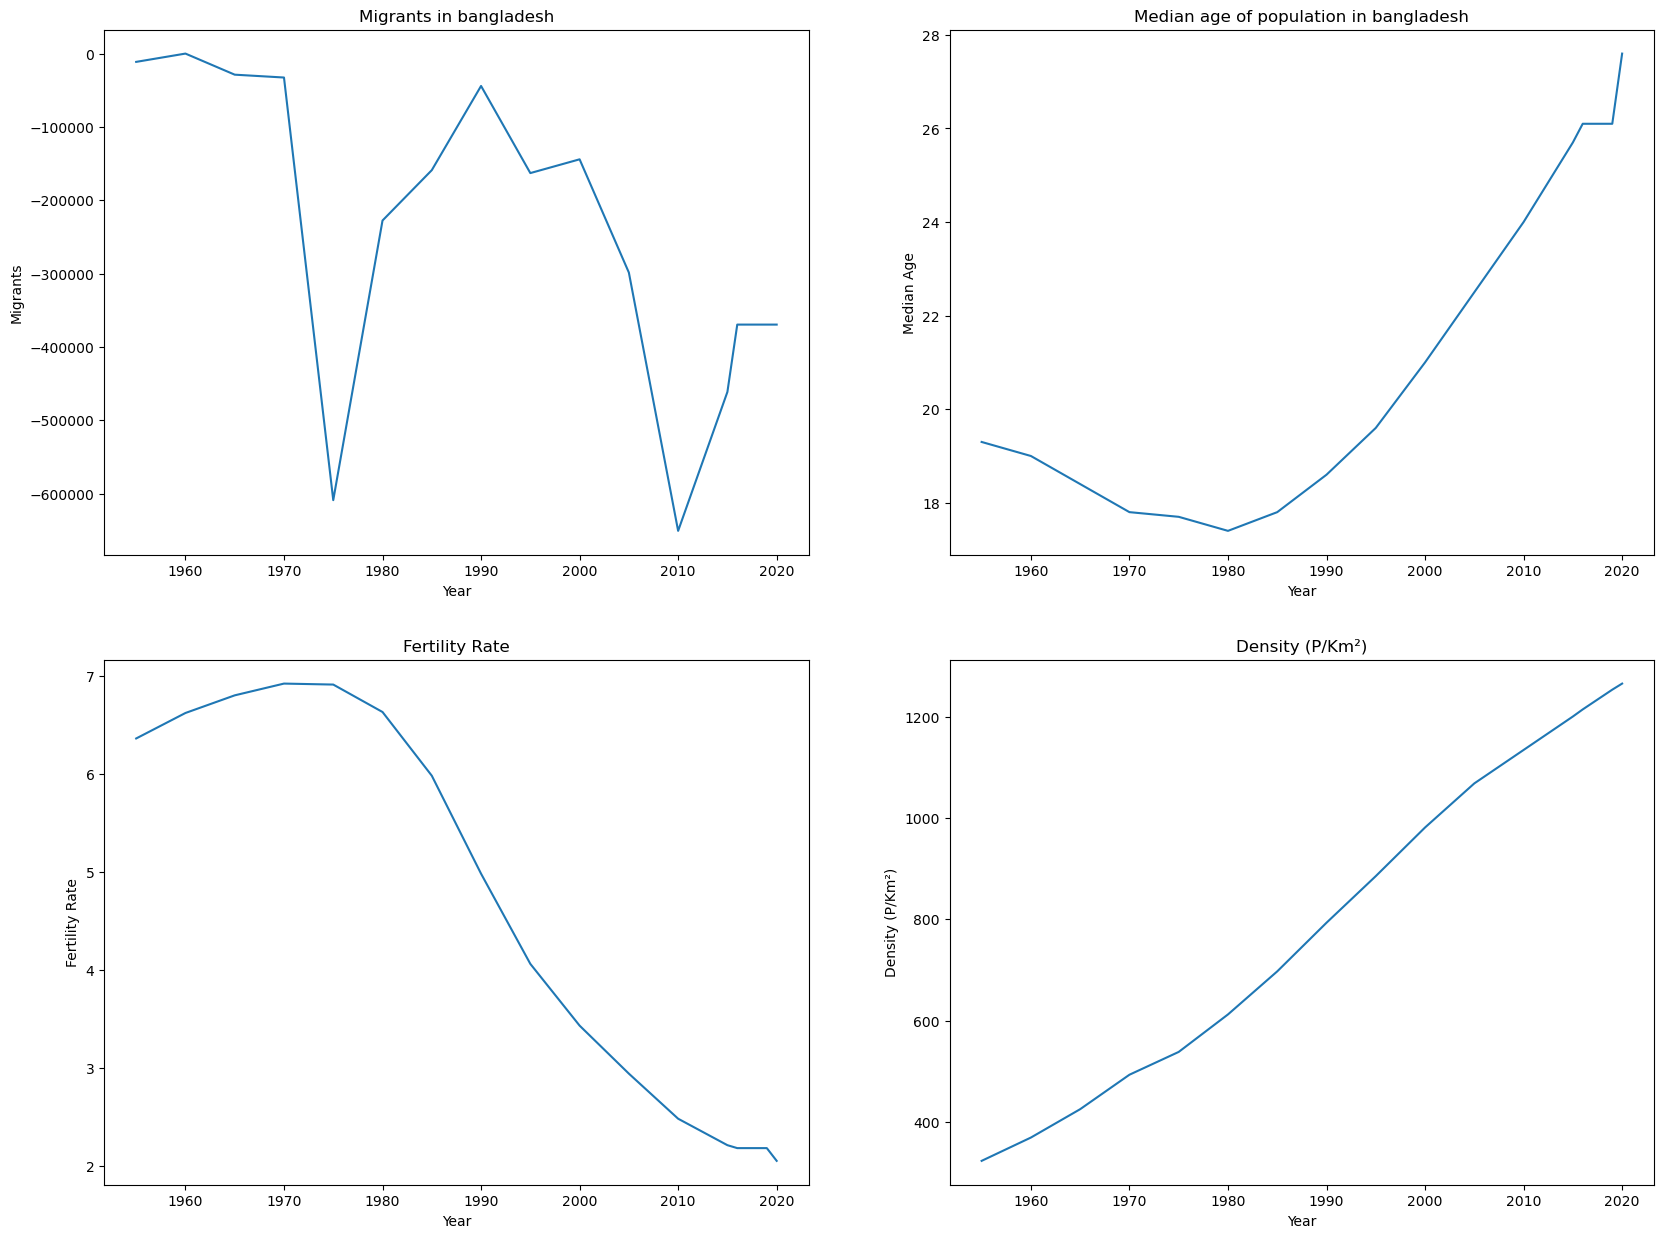

In [34]:
plt.figure(figsize=(20,15))
plt.subplot(2,2,1)
plt.plot(bangladesh_data['Year'],bangladesh_data['Migrants (net)'])
plt.xlabel('Year')
plt.ylabel('Migrants')
plt.title('Migrants in bangladesh')
plt.subplot(2,2,2)
plt.plot(bangladesh_data['Year'],bangladesh_data['Median Age'])
plt.xlabel('Year')
plt.ylabel('Median Age')
plt.title('Median age of population in bangladesh')
plt.subplot(2,2,3)
plt.plot(bangladesh_data['Year'],bangladesh_data['Fertility Rate'])
plt.xlabel('Year')
plt.ylabel('Fertility Rate')
plt.title('Fertility Rate')
plt.subplot(2,2,4)
plt.plot(bangladesh_data['Year'],bangladesh_data['Density (P/Km²)'])
plt.xlabel('Year')
plt.ylabel('Density (P/Km²)')
plt.title('Density (P/Km²)')

# Russia

In [35]:
russia_data=country.get_group('Russia')
russia_data.head()

,country,Year,Population,Yearly % Change,Yearly Change,Migrants (net),Median Age,Fertility Rate,Density (P/Km²),Urban Pop %,Urban Population,Country's Share of World Pop,World Population,Rank
3037,Russia,2020,145934462,0.04 %,62206,182456.0,39.6,1.82,9,73.7 %,107486269,1.87 %,7794798739,9
3038,Russia,2019,145872256,0.09 %,138218,182456.0,38.8,1.72,9,73.6 %,107327101,1.89 %,7713468100,9
3039,Russia,2018,145734038,0.14 %,203956,182456.0,38.8,1.72,9,73.5 %,107156855,1.91 %,7631091040,9
3040,Russia,2017,145530082,0.18 %,254699,182456.0,38.8,1.72,9,73.5 %,106972626,1.93 %,7547858925,9
3041,Russia,2016,145275383,0.20 %,290326,182456.0,38.8,1.72,9,73.5 %,106770279,1.95 %,7464022049,9


Text(0.5, 1.0, 'Density (P/Km²)')

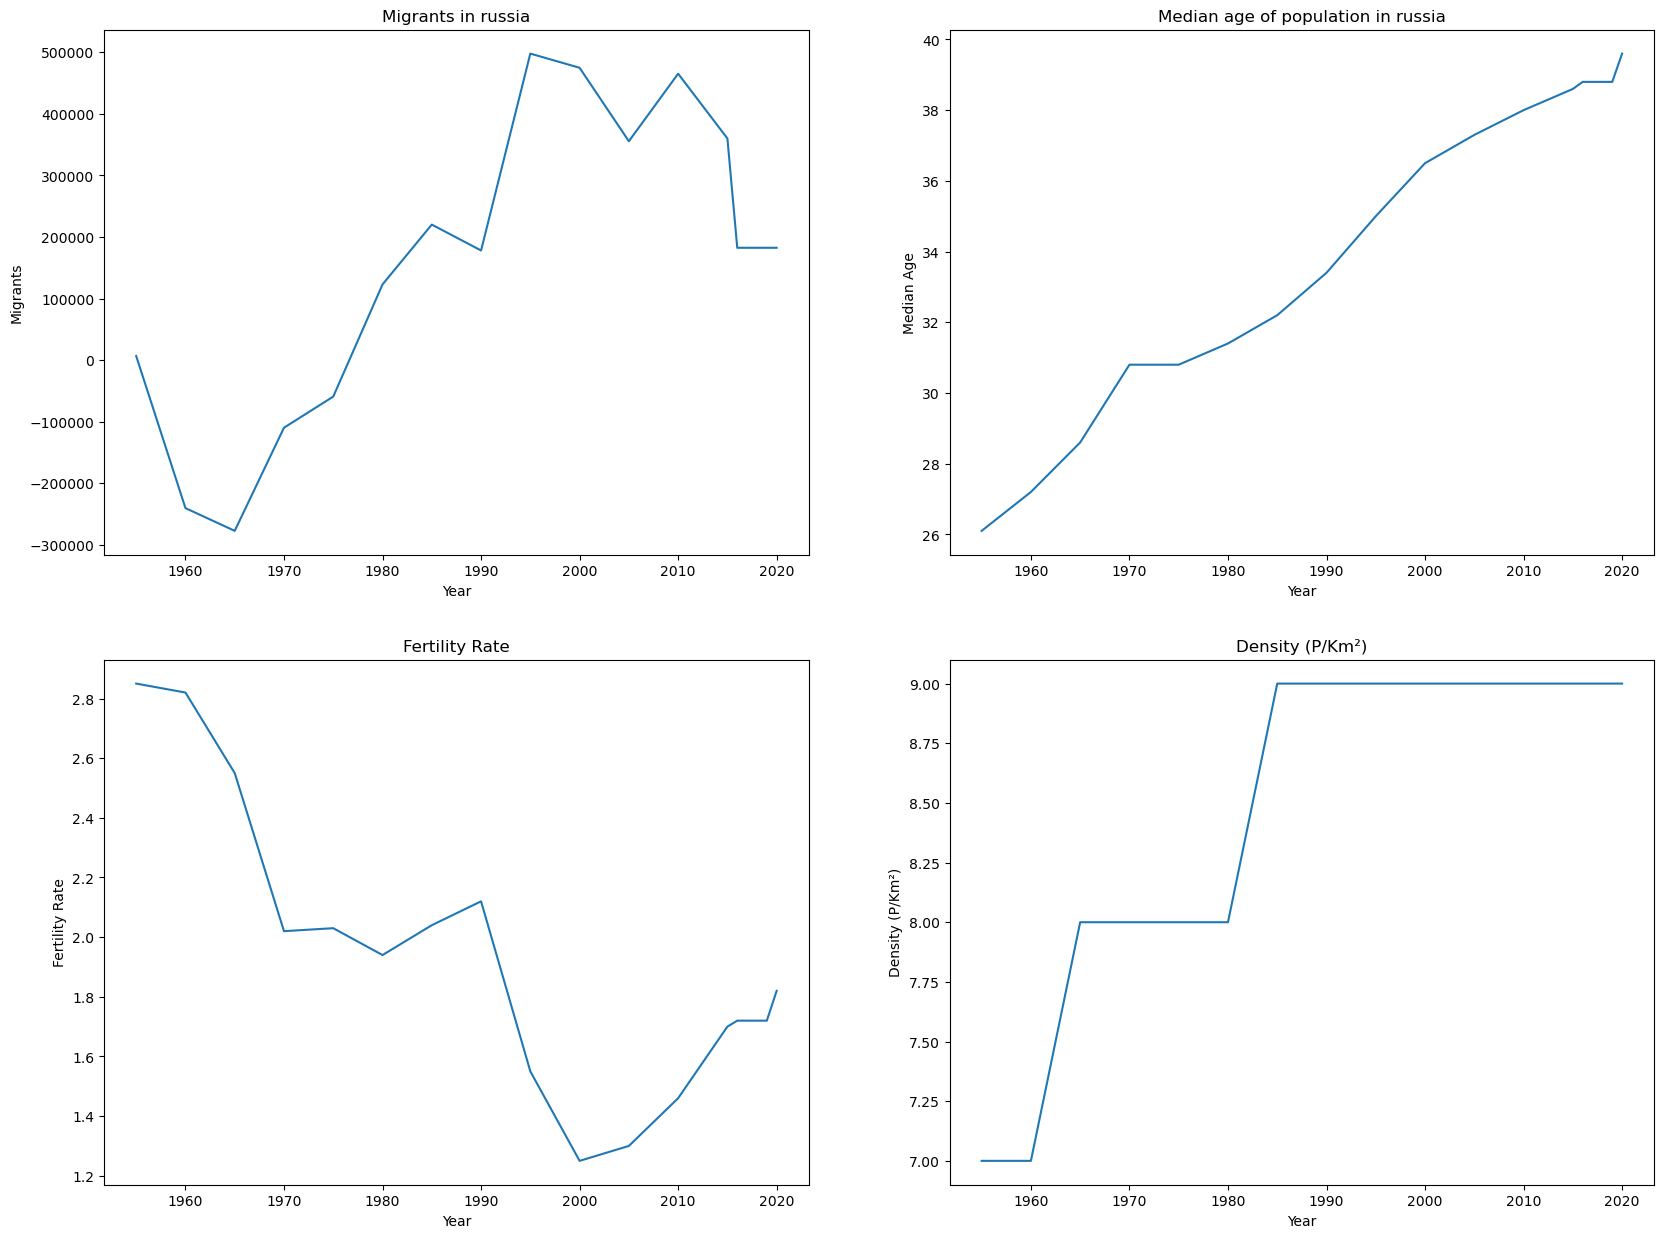

In [36]:
plt.figure(figsize=(20,15))
plt.subplot(2,2,1)
plt.plot(russia_data['Year'],russia_data['Migrants (net)'])
plt.xlabel('Year')
plt.ylabel('Migrants')
plt.title('Migrants in russia')
plt.subplot(2,2,2)
plt.plot(russia_data['Year'],russia_data['Median Age'])
plt.xlabel('Year')
plt.ylabel('Median Age')
plt.title('Median age of population in russia')
plt.subplot(2,2,3)
plt.plot(russia_data['Year'],russia_data['Fertility Rate'])
plt.xlabel('Year')
plt.ylabel('Fertility Rate')
plt.title('Fertility Rate')
plt.subplot(2,2,4)
plt.plot(russia_data['Year'],russia_data['Density (P/Km²)'])
plt.xlabel('Year')
plt.ylabel('Density (P/Km²)')
plt.title('Density (P/Km²)')

# Mexico

In [37]:
mexico_data=country.get_group('Mexico')
mexico_data.head()

,country,Year,Population,Yearly % Change,Yearly Change,Migrants (net),Median Age,Fertility Rate,Density (P/Km²),Urban Pop %,Urban Population,Country's Share of World Pop,World Population,Rank
2359,Mexico,2020,128932753,1.06 %,1357224,-60000.0,29.2,2.14,66,83.8 %,108074410,1.65 %,7794798739,10
2360,Mexico,2019,127575529,1.10 %,1384741,-60000.0,28.0,2.26,66,83.4 %,106450227,1.65 %,7713468100,10
2361,Mexico,2018,126190788,1.13 %,1413464,-60000.0,28.0,2.26,65,83.1 %,104811498,1.65 %,7631091040,11
2362,Mexico,2017,124777324,1.17 %,1443948,-60000.0,28.0,2.26,64,82.7 %,103158751,1.65 %,7547858925,11
2363,Mexico,2016,123333376,1.21 %,1475118,-60000.0,28.0,2.26,63,82.3 %,101492232,1.65 %,7464022049,11


Text(0.5, 1.0, 'Density (P/Km²)')

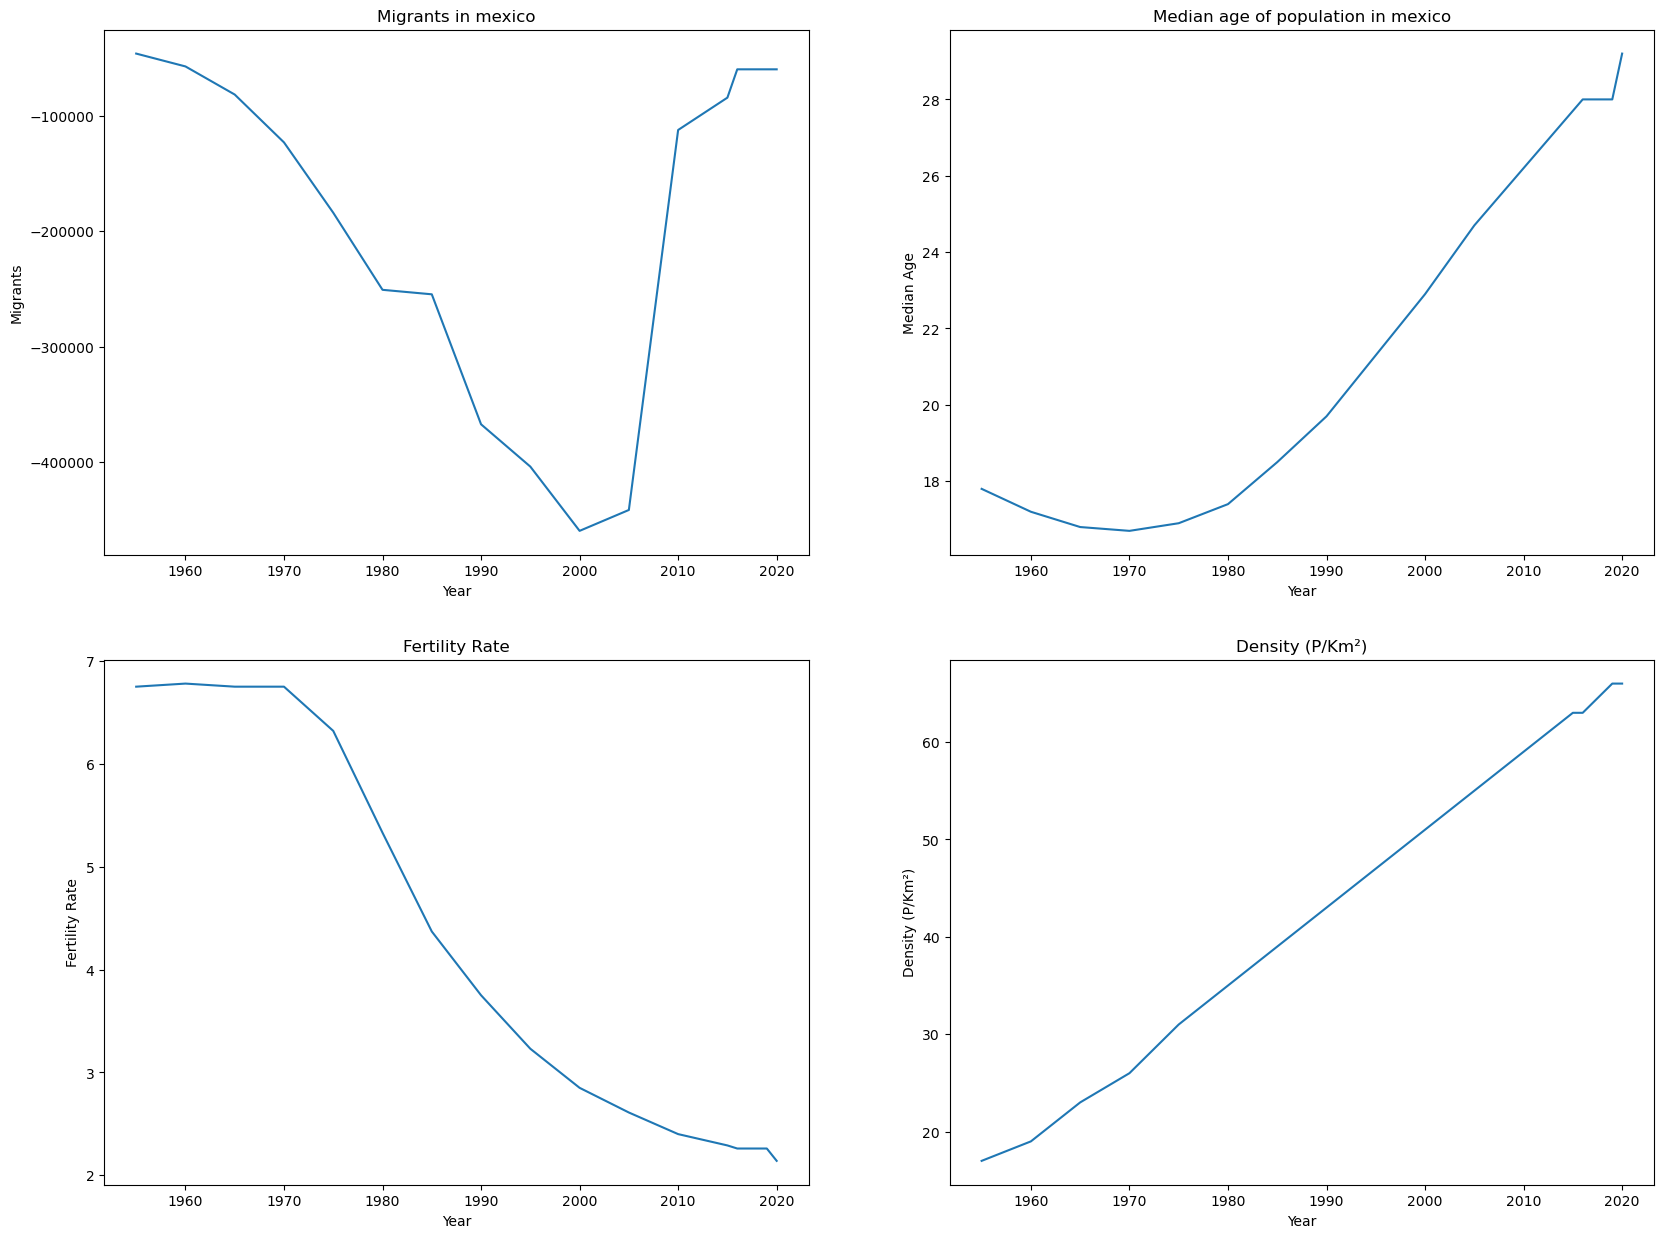

In [38]:
plt.figure(figsize=(20,15))
plt.subplot(2,2,1)
plt.plot(mexico_data['Year'],mexico_data['Migrants (net)'])
plt.xlabel('Year')
plt.ylabel('Migrants')
plt.title('Migrants in mexico')
plt.subplot(2,2,2)
plt.plot(mexico_data['Year'],mexico_data['Median Age'])
plt.xlabel('Year')
plt.ylabel('Median Age')
plt.title('Median age of population in mexico')
plt.subplot(2,2,3)
plt.plot(mexico_data['Year'],mexico_data['Fertility Rate'])
plt.xlabel('Year')
plt.ylabel('Fertility Rate')
plt.title('Fertility Rate')
plt.subplot(2,2,4)
plt.plot(mexico_data['Year'],mexico_data['Density (P/Km²)'])
plt.xlabel('Year')
plt.ylabel('Density (P/Km²)')
plt.title('Density (P/Km²)')

In [39]:
sort_by_rank = world.sort_values('Rank')
sort_by_rank.head(10)

,country,Year,Population,Yearly % Change,Yearly Change,Migrants (net),Median Age,Fertility Rate,Density (P/Km²),Urban Pop %,Urban Population,Country's Share of World Pop,World Population,Rank
767,China,2020,1439323776,0.39 %,5540090,-348399.0,38.4,1.69,153,60.8 %,875075919,18.47 %,7794798739,1
768,China,2019,1433783686,0.43 %,6135900,-348399.0,37.0,1.65,153,59.7 %,856409297,18.59 %,7713468100,1
784,China,1955,612241554,2.00 %,11564456,-51205.0,22.2,6.11,65,13.8 %,84639825,22.08 %,2773019936,1
783,China,1960,660408056,1.53 %,9633300,-11900.0,21.3,5.48,70,16.1 %,106561743,21.76 %,3034949748,1
782,China,1965,724218968,1.86 %,12762182,-225145.0,19.8,6.15,77,18.0 %,130684595,21.69 %,3339583597,1
781,China,1970,827601394,2.70 %,20676485,-32000.0,19.3,6.30,88,17.3 %,143513192,22.36 %,3700437046,1
780,China,1975,926240885,2.28 %,19727898,-221096.0,20.3,4.85,99,17.3 %,160244444,22.70 %,4079480606,1
779,China,1980,1000089235,1.55 %,14769670,-9401.0,21.9,3.01,107,19.2 %,192392094,22.43 %,4458003514,1
777,China,1990,1176883674,1.82 %,20258863,-86330.0,24.9,2.73,125,26.3 %,310022147,22.09 %,5327231061,1
778,China,1985,1075589361,1.47 %,15100025,-40000.0,23.5,2.52,115,22.8 %,244946241,22.08 %,4870921740,1


<Axes: xlabel='Year', ylabel='World Population'>

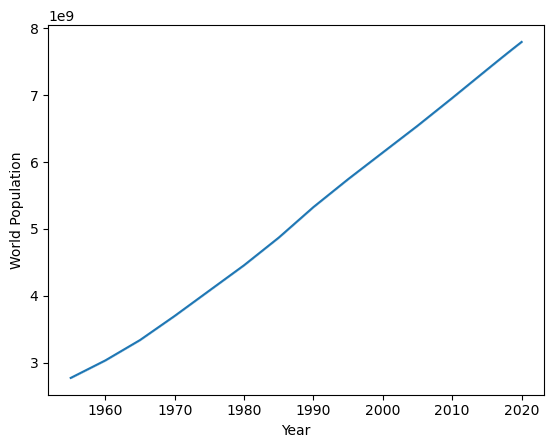

In [40]:
sns.lineplot(data=world,x='Year',y='World Population')

In [41]:
world.head()

,country,Year,Population,Yearly % Change,Yearly Change,Migrants (net),Median Age,Fertility Rate,Density (P/Km²),Urban Pop %,Urban Population,Country's Share of World Pop,World Population,Rank
0,Afghanistan,2020,38928346,2.33 %,886592,-62920.0,18.4,4.56,60,25.4 %,9904337,0.50 %,7794798739,37
1,Afghanistan,2019,38041754,2.34 %,869833,-62920.0,17.4,5.26,58,25.2 %,9582625,0.49 %,7713468100,37
2,Afghanistan,2018,37171921,2.41 %,875808,-62920.0,17.4,5.26,57,24.9 %,9273302,0.49 %,7631091040,38
3,Afghanistan,2017,36296113,2.58 %,913081,-62920.0,17.4,5.26,56,24.7 %,8971472,0.48 %,7547858925,39
4,Afghanistan,2016,35383032,2.82 %,969429,-62920.0,17.4,5.26,54,24.5 %,8670939,0.47 %,7464022049,39


## Population Rank Change of India and Neighbouring Countries 

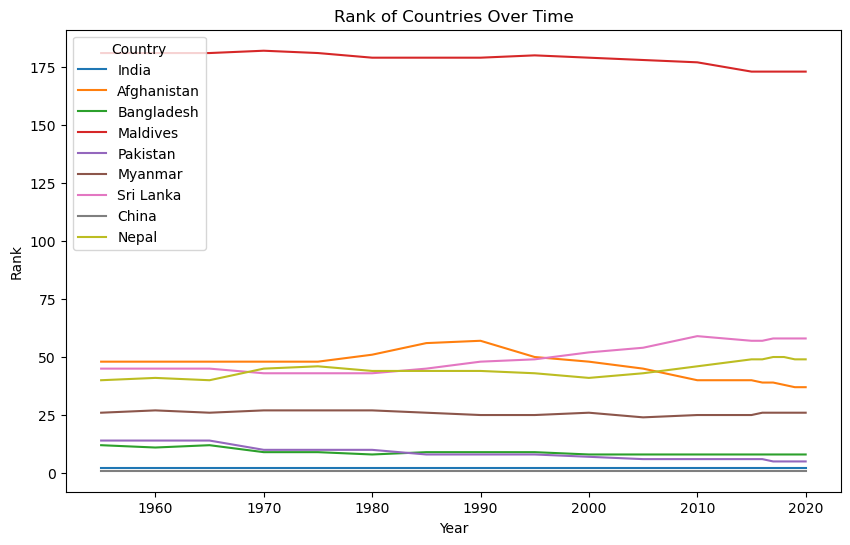

In [42]:
df_sorted = world.sort_values(['Year', 'Rank'])
countries = ['India', 'Afghanistan', 'Bangladesh', 'Maldives', 'Pakistan', 'Myanmar', 'Sri Lanka','China','Nepal']
plt.figure(figsize=(10, 6))
for country in countries:
    country_data = df_sorted[df_sorted['country'] == country]
    plt.plot(country_data['Year'], country_data['Rank'], label=country)

plt.title('Rank of Countries Over Time')
plt.xlabel('Year')
plt.ylabel('Rank')

plt.legend(title='Country')

plt.show()


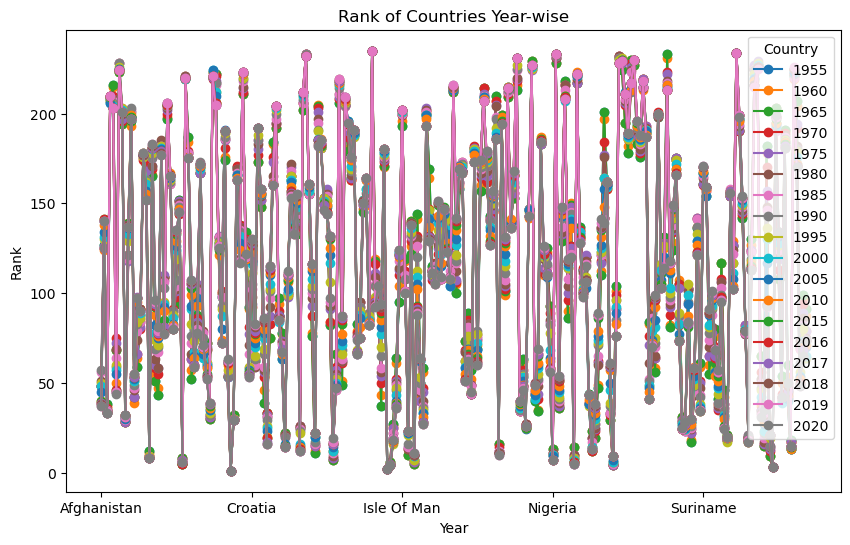

In [43]:
rank_data = world.groupby(['country', 'Year'])['Rank'].min().unstack()

# Create the plot
rank_data.plot(marker='o', figsize=(10, 6))

# Set the plot title and axis labels
plt.title('Rank of Countries Year-wise')
plt.xlabel('Year')
plt.ylabel('Rank')

# Add a legend
plt.legend(title='Country')

# Display the plot
plt.show()


<Axes: xlabel='country', ylabel='Rank'>

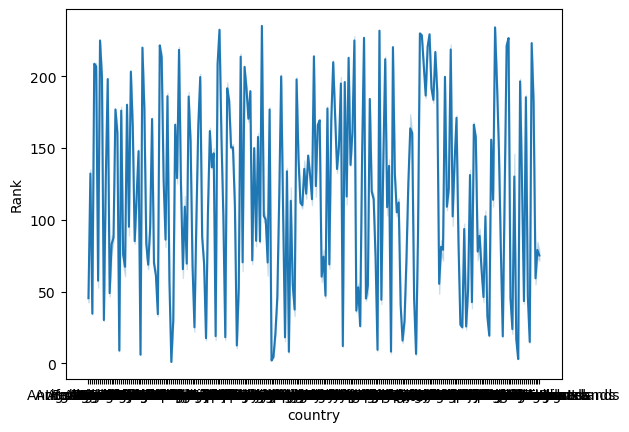

In [44]:
sns.lineplot(data=world,x='country',y='Rank')

<Axes: xlabel='country', ylabel='Migrants (net)'>

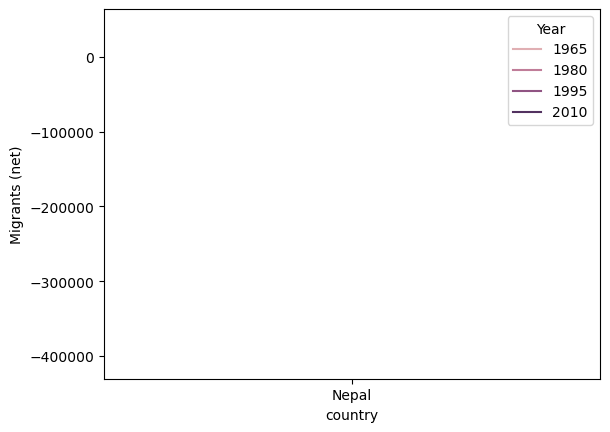

In [45]:
sns.lineplot(data=country_data,x='country',y="Migrants (net)",hue='Year')

array([[<Axes: title={'center': 'Year'}>,
        <Axes: title={'center': 'Population'}>,
        <Axes: title={'center': 'Yearly  Change'}>],
       [<Axes: title={'center': 'Migrants (net)'}>,
        <Axes: title={'center': 'Median Age'}>,
        <Axes: title={'center': 'Fertility Rate'}>],
       [<Axes: title={'center': 'Density (P/Km²)'}>,
        <Axes: title={'center': 'World Population'}>,
        <Axes: title={'center': 'Rank'}>]], dtype=object)

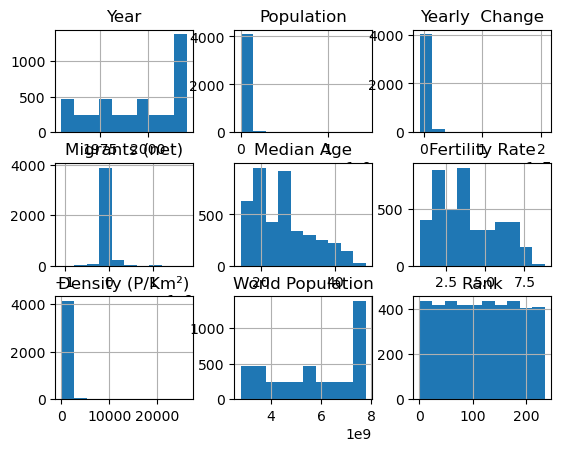

In [46]:
world.hist()

In [47]:
# plt.pie(world["Country's Share of World Pop"])